## Contents

- [Import data and descriptive statistics](#import-data-and-descriptive-statistics)  
- [Functions](#functions)  
- [Big Cap](#big-cap)  
    - [With volatility strategy](#with-volatility-strategy)  
    - [Momentum only](#momentum-only)  
- [Med Cap](#med-cap)  
    - [With volatility strategy](#with-volatility-strategy)  
    - [Momentum only](#momentum-only)  
- [Small Cap](#small-cap)  
    - [With volatility strategy](#with-volatility-strategy)  
    - [Momentum only](#momentum-only)  
- [General comparison](#general-comparison)


In [4]:
import pandas as pd
import numpy as np
from dateutil.relativedelta import relativedelta
import yfinance as yf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import skew

# Import data and descriptive statistics

In [5]:
df_prices = pd.read_excel("Stoxx 600 Originale.xlsm", sheet_name="Price", engine="openpyxl", header=1, index_col="Dates")
df_weights = pd.read_excel("Stoxx 600 Originale.xlsm", sheet_name="Peso", engine="openpyxl", header=1, index_col="Dates")
df_daily = pd.read_excel("Stoxx 600 Originale.xlsm", sheet_name="Price daily", engine="openpyxl", header=1, index_col="Dates")

In [6]:
df_prices.head()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Dates,,,,,,,,,,,,,,,,,,,,,
2002-12-31,6.54687,2.47241,18.27605,9.17238,33.5794,34.70243,41.95,20.15424,15.15,6.27089,...,46.57016,NaN,NaN,0.328,NaN,NaN,3.330,NaN,1.799,NaN
2003-01-31,5.85458,2.37867,17.53309,8.42747,30.9888,34.04929,38.57,19.33999,13.08,5.65534,...,59.75063,NaN,NaN,0.313,NaN,NaN,3.225,NaN,1.740,NaN
2003-02-28,5.84111,2.36517,16.29668,8.70416,30.2486,34.08141,36.75,18.68318,12.40,5.37017,...,53.09206,NaN,NaN,0.305,NaN,NaN,3.175,NaN,1.501,NaN
2003-03-31,5.81190,2.33054,16.12125,8.19188,28.6202,33.91623,37.31,18.12706,12.66,5.54032,...,52.84108,NaN,NaN,0.320,NaN,NaN,3.350,NaN,1.491,NaN
2003-04-30,5.68468,2.52119,17.97879,8.56458,28.9903,35.32760,36.65,18.25810,15.16,5.37285,...,69.87681,NaN,NaN,0.513,NaN,NaN,3.260,NaN,2.903,NaN


In [7]:
df_weights.head()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Dates,,,,,,,,,,,,,,,,,,,,,
2002-12-31,3.754000,3.033265,2.749009,2.566902,2.398687,2.369681,2.292292,2.061552,1.854091,1.557885,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-01-31,3.613053,3.139546,2.929012,2.520465,2.373876,2.482401,2.233168,2.112119,1.709071,1.511649,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-02-28,3.748959,3.246620,2.831386,2.707367,2.409883,2.584156,2.212923,2.122023,1.685044,1.492852,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-03-31,3.839110,3.292481,2.869654,2.622410,2.353255,2.478173,2.294841,2.118960,1.789424,1.581186,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003-04-30,3.383923,3.209768,2.883989,2.803628,2.148083,2.326164,2.031438,1.923328,1.930994,1.381831,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df_daily.head()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
Dates,,,,,,,,,,,,,,,,,,,,,
2002-01-01,8.72226,4.18054,28.14317,11.47251,39.5749,40.52545,56.90,23.91002,28.96,7.70956,...,18.35674,NaN,NaN,1.088,NaN,NaN,4.145,NaN,10.090,NaN
2002-01-02,8.48942,4.02933,27.33882,11.29900,38.8841,39.68591,54.40,23.71722,27.85,7.57813,...,18.21234,NaN,NaN,1.088,NaN,NaN,4.100,NaN,10.637,NaN
2002-01-03,8.56310,4.18204,28.10616,11.59081,39.3282,38.92710,54.90,23.72699,29.45,7.69878,...,18.21234,NaN,NaN,1.088,NaN,NaN,4.120,NaN,10.935,NaN
2002-01-04,8.59106,4.22866,27.72348,11.78465,39.4022,38.62622,54.80,23.72319,29.38,7.70455,...,18.21234,NaN,NaN,1.115,NaN,NaN,3.975,NaN,10.935,NaN
2002-01-07,8.55836,4.16140,27.40609,11.66068,38.9087,38.80380,54.45,23.74358,28.90,7.65664,...,18.15013,NaN,NaN,1.113,NaN,NaN,4.045,NaN,10.935,NaN


In [9]:
df_prices.dtypes

BP PLC                     float64
Vodafone Group PLC         float64
GlaxoSmithKline PLC        float64
HSBC Holdings PLC          float64
TOTAL SA                   float64
                            ...   
Tritax Big Box REIT PLC    float64
Bechtle AG                 float64
DiaSorin SpA               float64
Evotec AG                  float64
Linde PLC                  float64
Length: 1255, dtype: object

In [10]:
type(df_prices.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [11]:
type(df_daily.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [12]:
df_daily.dtypes

BP PLC                     float64
Vodafone Group PLC         float64
GlaxoSmithKline PLC        float64
HSBC Holdings PLC          float64
TOTAL SA                   float64
                            ...   
Tritax Big Box REIT PLC    float64
Bechtle AG                 float64
DiaSorin SpA               float64
Evotec AG                  float64
Linde PLC                  float64
Length: 1255, dtype: object

In [13]:
type(df_weights.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [14]:
df_weights.dtypes

BP PLC                     float64
Vodafone Group PLC         float64
GlaxoSmithKline PLC        float64
HSBC Holdings PLC          float64
TOTAL SA                   float64
                            ...   
Tritax Big Box REIT PLC    float64
Bechtle AG                 float64
DiaSorin SpA               float64
Evotec AG                  float64
Linde PLC                  float64
Length: 1255, dtype: object

In [15]:
df_weights.describe()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
count,192.000000,192.000000,192.000000,192.000000,192.000000,178.000000,31.000000,178.000000,192.000000,31.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000
mean,2.190172,1.729845,1.616376,2.347708,1.758955,2.098274,1.952322,2.366142,0.729499,1.306326,...,0.030809,0.029690,0.032507,0.028985,0.028754,0.029531,0.026948,0.027141,0.028231,0.742305
std,0.779679,0.677042,0.458172,0.381681,0.293210,0.400004,0.158535,0.521661,0.487995,0.120635,...,0.000749,0.001304,0.001740,0.001445,0.002068,0.000743,0.001992,0.001746,0.003055,0.361030
min,1.122954,0.569168,0.862158,1.507279,1.276902,1.231054,1.740615,1.493689,0.120334,1.111980,...,0.030192,0.028523,0.030755,0.027356,0.026391,0.028899,0.024777,0.025144,0.026322,0.487018
25%,1.524696,1.060766,1.265917,2.050963,1.531236,1.814424,1.856978,1.810969,0.318267,1.230821,...,0.030392,0.028987,0.031643,0.028421,0.028013,0.029121,0.026075,0.026521,0.026469,0.614661
50%,1.983288,1.761540,1.509147,2.302297,1.721807,2.109596,1.890811,2.571848,0.520622,1.279614,...,0.030593,0.029451,0.032531,0.029487,0.029635,0.029343,0.027373,0.027898,0.026617,0.742305
75%,2.869387,2.049782,1.967345,2.644705,1.963509,2.373016,2.043887,2.800922,1.092953,1.357958,...,0.031117,0.030274,0.033382,0.029799,0.029935,0.029846,0.028033,0.028139,0.029186,0.869949
max,3.839110,3.314793,2.929012,3.278621,2.415685,2.910961,2.294841,3.150556,1.931830,1.581186,...,0.031642,0.031097,0.034234,0.030111,0.030235,0.030350,0.028693,0.028380,0.031755,0.997592


In [16]:
df_daily.describe()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
count,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,4414.000000,...,4414.000000,3437.000000,1282.000000,4414.000000,431.000000,1301.000000,4414.000000,2968.000000,4414.000000,25.000000
mean,6.453731,2.566730,17.794789,8.767624,43.590733,49.945179,50.095911,41.691694,10.021899,7.370977,...,822.065973,6.018404,12.615246,18.709300,43.213730,1.561873,21.436544,37.075188,4.447267,140.150000
std,1.426730,0.412331,2.858235,1.961859,6.697610,16.350648,4.246681,18.547576,6.050525,0.654547,...,732.358097,3.665155,3.810708,27.802987,3.342524,0.160886,20.197937,20.805650,4.073890,3.492015
min,3.698570,1.557060,10.682340,3.324510,27.287900,26.813830,33.490000,16.147000,1.371000,4.876020,...,17.782990,1.331320,6.210000,0.275000,38.865700,1.163360,2.495000,10.865000,0.550000,134.700000
25%,5.381115,2.355620,15.926690,7.514527,38.811250,37.700665,51.600000,25.211517,5.070000,7.633250,...,194.959068,2.996870,9.123750,3.425000,40.620715,1.485880,8.155000,22.967500,2.430000,137.450000
50%,5.993845,2.560725,17.830215,8.222210,42.685000,42.959370,51.600000,37.948450,7.995000,7.633250,...,526.552210,4.163640,11.765000,6.491500,41.814540,1.621410,12.876500,31.000000,3.126000,139.800000
75%,7.395805,2.839823,19.439433,10.628877,48.418750,65.019797,51.600000,57.584360,14.480000,7.633250,...,1514.290730,9.567600,16.250000,19.102500,45.588500,1.675970,31.120000,47.752500,4.079750,142.950000
max,10.279440,4.228660,28.875220,13.356580,63.050000,97.948920,62.900000,78.776740,29.450000,8.631470,...,2435.967880,14.938930,20.780000,153.400000,52.215750,1.834290,89.900000,98.200000,22.950000,146.850000


In [17]:
df_prices.describe()

,BP PLC,Vodafone Group PLC,GlaxoSmithKline PLC,HSBC Holdings PLC,TOTAL SA,Novartis AG,Royal Dutch Petroleum Co,Nestle SA,Nokia OYJ,Shell Transport & Trading Co Ltd/The,...,LPP SA,AAK AB,Valmet OYJ,Nemetschek SE,Galenica AG,Tritax Big Box REIT PLC,Bechtle AG,DiaSorin SpA,Evotec AG,Linde PLC
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,...,192.000000,159.000000,59.000000,192.000000,20.000000,60.000000,192.000000,137.000000,192.000000,2.000000
mean,6.347692,2.561971,17.441031,8.642001,44.033244,50.520282,49.949896,42.908554,9.516224,7.369277,...,872.648867,6.055881,12.640763,20.020130,43.240118,1.567888,22.648484,37.258307,4.396333,142.675000
std,1.350617,0.401844,2.441043,1.939328,6.793030,16.826690,4.061933,18.643376,5.825311,0.658194,...,731.053124,3.709128,3.808904,28.553082,3.649818,0.162455,20.411263,20.972517,4.179337,3.075914
min,3.893040,1.653040,11.732850,4.269490,28.620200,28.160990,36.650000,17.785650,1.620000,5.283980,...,46.570160,1.493810,6.255000,0.305000,39.372790,1.199250,3.175000,11.300000,0.560000,140.500000
25%,5.392143,2.364305,15.769628,7.474650,38.910000,37.428170,51.600000,26.456005,5.022500,7.633250,...,221.717543,3.050560,9.092500,3.863750,40.477937,1.520922,8.611250,23.000000,2.488750,141.587500
50%,5.867740,2.563765,17.691130,8.078560,42.970000,43.134075,51.600000,40.645645,7.112500,7.633250,...,555.926800,4.163640,11.790000,6.887500,41.400995,1.614045,13.720000,30.840000,3.052000,142.675000
75%,7.149617,2.816565,19.288320,10.466295,49.075000,65.460995,51.600000,60.455250,13.657500,7.633250,...,1588.480667,9.740485,16.105000,20.225750,45.804350,1.683428,32.526250,48.640000,4.049500,143.762500
max,9.904260,3.553680,22.436270,12.943590,60.260000,94.479020,54.000000,76.244390,27.350000,8.041170,...,2404.681230,14.938930,20.120000,141.400000,51.118790,1.817990,89.650000,97.700000,22.060000,144.850000


# Functions

### Capitalization Groups in the S\&P 500


The function `get_cap_group` selects firms based on their *market cap weights within the S&P 500* at a given date.  
These weights represent each company's share of the total index capitalization.

Companies are *ranked by weight* (from smallest to largest), then grouped as follows:

- **Small-cap (`cap_level = 1`)**: bottom 20% → the 20% of firms with the *smallest* weights  
- **Mid-cap (`cap_level = 2`)**: next 30% → firms ranked from the 20th to the 50th percentile  
- **Large-cap (`cap_level = 3`)**: top 50% → the 50% of firms with the *largest* weights

Even though all firms in the S&P 500 are large in absolute size, this *relative classification* helps analyze how investment strategies perform across different size segments within the index.


In [18]:
def get_cap_group(df, date, cap_level):
    """
    Restituisce la lista di aziende (colonne) che appartengono a una determinata fascia
    di capitalizzazione basata sui pesi in una data specifica.

    cap_level:
        1 = small cap (0–20%)
        2 = mid cap (20–50%)
        3 = large cap (50–100%)
    """

    date = pd.to_datetime(date)

    row = df.loc[date].dropna()

    sorted_row = row.sort_values()

    n = len(sorted_row)

    if cap_level == 1:
        selected = sorted_row.iloc[:int(n * 0.2)]
    elif cap_level == 2:
        selected = sorted_row.iloc[int(n * 0.2):int(n * 0.5)]
    elif cap_level == 3:
        selected = sorted_row.iloc[int(n * 0.5):]
    else:
        raise ValueError("cap_level deve essere 1 (small), 2 (mid) o 3 (large).")

    return list(selected.index)

### **Skewness Proxy: SKEWMAX**

In this implementation, expected skewness is approximated using a simple and robust proxy called **SKEWMAX**, defined as the **maximum daily return** of a stock during the month prior to the portfolio formation date. 

Formally, for each stock $i$ at time $t$, the proxy is computed as:

$
\text{SKEWMAX}_{i,t} = \max_{\tau \in \text{month}(t-1)} r_{i,\tau}
$

where $ r_{i,\tau} $ is the daily return of stock $ i $ on day $ \tau $. Only stocks with at least **80% valid daily returns** in the reference month are included to ensure data quality.

This proxy captures the presence of extreme positive returns that may reflect investor overreaction or lottery-like demand, both of which have been shown to predict lower future returns. Unlike traditional skewness, which relies on the third central moment and is sensitive to noise in short windows, SKEWMAX is more robust and interpretable in a monthly setting.

**Reference:**  
Jacobs, Heiko and Regele, Tobias and Weber, Martin, Expected Skewness and Momentum (August 2016). Available at SSRN: https://ssrn.com/abstract=2600014 or http://dx.doi.org/10.2139/ssrn.2600014


In [19]:
def compute_skewmax_filtered(df_returns, companies, reference_date, min_valid_ratio=0.8):
    """
    Calcola lo SKEWMAX (massimo rendimento giornaliero) per il mese precedente alla reference_date
    solo per le aziende con almeno una copertura pari a `min_valid_ratio`.

    Parametri:
    - df_returns: DataFrame con rendimenti giornalieri (index datetime, colonne = aziende)
    - companies: lista di aziende
    - reference_date: fine mese come stringa o datetime
    - min_valid_ratio: soglia minima di completezza (es. 0.8 = 80%)

    Ritorna:
    - Series con skewmax per le aziende con dati sufficienti
    """
    reference_date = pd.to_datetime(reference_date)
    month_start = (reference_date - relativedelta(months=1)).replace(day=1)
    month_end = reference_date - pd.offsets.MonthBegin(1)

    df_month = df_returns.loc[month_start:month_end, companies]

    valid_counts = df_month.notna().sum()
    total_days = len(df_month)

    sufficient_companies = valid_counts[valid_counts >= total_days * min_valid_ratio].index

    skewmax_series = df_month[sufficient_companies].max()

    return skewmax_series

In [20]:
def select_skew_companies(skew_series, pct):
    """
    Restituisce i titoli nel X% della distribuzione di skewness.

    Parametri:
    - skew_series: pd.Series con skewness per azienda (indice = nome azienda)
    - pct: percentuale

    Output:
    - Lista dei nomi delle aziende nel X%
    """
    n = int(len(skew_series) * pct)
    selected = skew_series.sort_values().iloc[:n]
    return list(selected.index)

### **Momentum Calculation (t‒12 to t‒2)**

The function `compute_momentum_monthly` estimates 12-month momentum for a set of stocks, excluding the most recent month ($t - 1$).  
This follows the standard definition used in academic literature (e.g., Jegadeesh & Titman, 1993).

For each stock $i$, the momentum at time $t$ is computed as the cumulative return between months $t - x$ and $t - 2$:

$\text{MOM}_{i,t} = \frac{P_{i,t-2}}{P_{i,t-x}} - 1$

Where:
- $P_{i,t-2}$ is the closing price of stock $i$ at month $t - 2$
- $P_{i,t-x}$ is the closing price at month $t - x$ (default: 12 months prior)
- The most recent month $t - 1$ is skipped to avoid short-term reversals

**Parameters**

- $x = 12$: the lookback window, typically 12 months  
- $\text{min\_valid\_ratio} = 0.8$: minimum required data availability (80% of months in the window)  
- $\text{reference\_date}$: the end-of-month $t$ at which the momentum is computed  

Only companies with sufficient data coverage in the window $[t - x, t - 2]$ are considered, ensuring robustness in the cumulative return estimate.

Momentum strategies exploit the empirical regularity that **past winners tend to outperform past losers** over medium-term horizons (3 to 12 months).  
By excluding the most recent month, the calculation avoids short-term mean reversion and better captures sustained trends.

**Reference:**  

Jegadeesh, N., & Titman, S. (1993). *Returns to Buying Winners and Selling Losers: Implications for Stock Market Efficiency*.  
Journal of Finance, 48(1), 65–91.


In [21]:
def compute_momentum_monthly(df_prices, companies, reference_date, x =12, min_valid_ratio=0.8):
    """
    Calcola il momentum (rendimento cumulato) da t-12 a t-2,
    solo per aziende con almeno min_valid_ratio dei dati necessari.

    Parametri:
    - df_prices: DataFrame con prezzi mensili (indice datetime)
    - companies: lista di aziende
    - reference_date: data di riferimento (fine mese)
    - min_valid_ratio: soglia minima di disponibilità dati richiesta (es. 0.8 = 80%)

    Output:
    - Series con momentum calcolato solo sulle aziende valide
    """
    reference_date = pd.to_datetime(reference_date, dayfirst=True)

    start = reference_date - pd.DateOffset(months=x)
    end = reference_date - pd.DateOffset(months=2)

    df_sub = df_prices[companies].copy().sort_index()

    try:
        start_date = df_sub.index[df_sub.index.get_indexer([start], method='bfill')[0]]
        end_date = df_sub.index[df_sub.index.get_indexer([end], method='ffill')[0]]
    except IndexError:
        return pd.Series(dtype=float)

    df_window = df_sub.loc[start_date:end_date]

    valid_counts = df_window.notna().sum()
    total_months = len(df_window)

    sufficient = valid_counts[valid_counts >= total_months * min_valid_ratio].index

    if len(sufficient) == 0:
        return pd.Series(dtype=float)

    price_start = df_window.loc[start_date, sufficient]
    price_end = df_window.loc[end_date, sufficient]

    momentum = (price_end / price_start) - 1
    return momentum

In [22]:
def select_momentum(momentum_series, pct):
    """
    Seleziona le aziende nel top X% per momentum.

    Parametri:
    - momentum_series: pd.Series con valori di momentum (indice = aziende)
    - pct: percentuale

    Output:
    - Lista delle aziende selezionate
    """
    n = int(len(momentum_series) * pct)
    top = momentum_series.sort_values(ascending=False).iloc[:n]
    return list(top.index)


### **Skewness-Momentum Long-Short Strategy**

This strategy combines **behavioral skewness signals** and **price momentum** to construct a monthly rebalanced long-short portfolio, inspired by cross-sectional factor investing.

At each month $t$, the strategy:

1. **Filters stocks** within a specific capitalization tier (e.g., large-cap) using market cap weights from the S\&P 500.
2. **Computes expected skewness** using the **SKEWMAX proxy**, defined as the maximum daily return in month $t-1$.
3. **Computes momentum** as the cumulative return from month $t-12$ to $t-2$.

**Portfolio Construction**

- **Long Leg**:
  - Select the bottom `skew_pct` (e.g., 20%) of stocks with the **lowest SKEWMAX**.
  - Among them, select the top `momentum_pct` with **highest past momentum**.

- **Short Leg**:
  - Select the top `skew_pct` of stocks with the **highest SKEWMAX**.
  - Among them, select the bottom `momentum_pct` with **lowest past momentum**.

This strategy exploits the tendency of stocks with low upside skewness and high momentum to outperform those with lottery-like spikes but poor past performance. It is rebalanced monthly using updated skewness and momentum signals.


#### **Monthly Return Calculation**

At each step $t$, returns are computed as follows:

- **Price Return**:  
  For a stock $i$ between two months:
  $$
  r_{i,t} = \frac{P_{i,t+1} - P_{i,t}}{P_{i,t}}
  $$

- **Portfolio Weights**:  
  Stocks are **value-weighted** based on their price at $t$:
  $$
  w_{i,t} = \frac{P_{i,t}}{\sum_{j \in \text{leg}} P_{j,t}}
  $$

- **Leg Returns**:  
  Long and short returns are the weighted average of constituent returns:
  $$
  R^{\text{long}}_t = \sum_{i \in \text{long}} w_{i,t} \cdot r_{i,t} \quad , \quad
  R^{\text{short}}_t = \sum_{i \in \text{short}} w_{i,t} \cdot r_{i,t}
  $$

- **Strategy Return**:  
  The net return is the **difference** between long and short legs:
  $$
  R^{\text{strategy}}_t = R^{\text{long}}_t - R^{\text{short}}_t
  $$




In [23]:
def run_skew_momentum_strategy(df_prices, df_weights, df_daily, start_date, end_date, x=12,
                               skew_pct=0.2, momentum_pct=0.2, cap_level=3):
    """
    Esegue una strategia long-short basata su skewness attesa (SKEWMAX) e momentum.

    Parametri:
    - df_prices: DataFrame con prezzi mensili
    - df_weights: DataFrame con pesi/capitalizzazioni mensili
    - df_daily: DataFrame con prezzi giornalieri
    - start_date, end_date: stringa o datetime (es: '2003-01-31')
    - x: window for momentum
    - skew_pct: percentuale di titoli con skewness bassa (per il long)
    - momentum_pct: percentuale di titoli con momentum alto (per il long)
    - cap_level: livello di capitalizzazione (1=small, 2=mid, 3=large)

    Output:
    - DataFrame con rendimenti mensili della strategia long-short
    """
    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        skew_series = compute_skewmax_filtered(df_daily.pct_change(), companies, ref_date)

        # LONG: bassa skew + alto momentum
        low_skew = select_skew_companies(skew_series, skew_pct)
        momentum_low_skew = compute_momentum_monthly(df_prices, low_skew, ref_date, x)
        long_companies = select_momentum(momentum_low_skew, momentum_pct)

        # SHORT: alta skew + basso momentum
        high_skew = select_skew_companies(-skew_series, skew_pct)
        momentum_high_skew = compute_momentum_monthly(df_prices, high_skew, ref_date, x)
        short_companies = select_momentum(-momentum_high_skew, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg weighted return
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg weighted return
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        net_return = long_return - short_return
        strategy_returns.append(net_return)

    return pd.DataFrame({'long_short': strategy_returns}, index=all_dates[:len(strategy_returns)])


### **Strategy Performance Metrics (Annualized)**

This function evaluates the performance of a long-short investment strategy using standard risk-adjusted and factor-adjusted metrics.  
It assumes monthly returns and uses a monthly risk-free rate derived from short-term government bond yields.


- **CAPM Alpha (Annualized)**

  CAPM alpha measures the strategy's excess return over what would be predicted by its exposure to the overall market:

  $$
  r_t^{\text{strategy}} = \alpha + \beta \cdot r_t^{\text{market}} + \varepsilon_t
  $$

  The market return used here is the monthly return of STOXX600  
  The intercept $\alpha$ is annualized as:

  $$
  \alpha_{\text{annual}} = (1 + \alpha_{\text{monthly}})^{12} - 1
  $$


- **Fama-French 3-Factor Alpha (Annualized)**

  To control for additional systematic risk exposures, the strategy is also regressed on the international Fama-French 3 factors, which include:

  - Market excess return (Mkt-RF)
  - Size factor (SMB): small minus big
  - Value factor (HML): high book-to-market minus low

  The model becomes:

  $$
  r_t^{\text{strategy}} = \alpha + \beta_1 \cdot \text{Mkt-RF}_t + \beta_2 \cdot \text{SMB}_t + \beta_3 \cdot \text{HML}_t + \varepsilon_t
  $$

  These monthly factor returns are precomputed and loaded externally from Fama-French 3 Factors (International):  
  [Ken French Data Library – International Factors](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#International)

  The intercept $\alpha$ is interpreted as the strategy’s return unexplained by these factors and is annualized in the same way.


- **Sharpe Ratio (Annualized)**

  The Sharpe Ratio evaluates the strategy's excess return per unit of total risk:

  $$
  \text{Sharpe}_{\text{annual}} = \frac{\mathbb{E}[r_t - r_{f,t}]}{\sigma} \cdot \sqrt{12}
  $$

  The risk-free rate $r_{f,t}$ is the monthly value of the 3-month government bond rate, converted to decimal format.


- **Sortino Ratio (Annualized)**

  The Sortino Ratio is a variation of the Sharpe Ratio that penalizes only downside volatility:

  $$
  \text{Sortino}_{\text{annual}} = \frac{\mathbb{E}[r_t - r_{f,t}]}{\sigma_{\text{down}}} \cdot \sqrt{12}
  $$

  where $\sigma_{\text{down}}$ is the standard deviation of negative excess returns.


- **Information Ratio (Annualized)**

  This ratio compares the strategy’s active return (versus the market benchmark) to the volatility of that difference:

  $$
  \text{IR}_{\text{annual}} = \frac{\mathbb{E}[r_t^{\text{strategy}} - r_t^{\text{market}}]}{\text{std}(r_t^{\text{strategy}} - r_t^{\text{market}})} \cdot \sqrt{12}
  $$

  It measures the consistency of outperformance relative to the benchmark.


- **Annualized Volatility and Downside Volatility**

  - **Total volatility**:
    $$
    \sigma_{\text{annual}} = \sigma_{\text{monthly}} \cdot \sqrt{12}
    $$

  - **Downside volatility**:
    $$
    \sigma_{\text{down, annual}} = \sigma_{\text{down, monthly}} \cdot \sqrt{12}
    $$


- **Maximum Drawdown**

  Maximum drawdown (MDD) captures the largest peak-to-trough decline in cumulative returns:

  $$
  \text{MDD}_t = \min \left( \frac{C_t - \max_{s \leq t} C_s}{\max_{s \leq t} C_s} \right), \quad \text{where} \quad C_t = \prod_{s=1}^{t}(1 + r_s)
  $$

  It quantifies the worst historical loss an investor would have experienced over time.




In [24]:
def analyze_strategy_metrics(df,
                              market_col='stoxx600_monthly_return',
                              strategy_col='long_short',
                              rf_col='IRX_yield'):
    """
    Calcola le metriche di performance annualizzate per una strategia long-short,
    usando un tasso privo di rischio mensile variabile (es. IRX_yield).

    Parametri:
    - df: DataFrame con le colonne richieste
    - market_col: rendimento mensile del benchmark (es. STOXX600)
    - strategy_col: rendimento mensile della strategia
    - rf_col: nome della colonna con il tasso risk-free mensile (espresso in %)

    Ritorna:
    - Dizionario con alpha annualizzati, Sharpe, Sortino, Information ratio, volatilità e max drawdown.
    """

    required_cols = [strategy_col, market_col, rf_col, 'Mkt-RF', 'SMB', 'HML']
    cols_to_keep = [col for col in required_cols if col in df.columns]
    df = df[cols_to_keep].dropna().copy()

    # Calcolo dell’excess return con tasso variabile (in %)
    df['rf_monthly'] = df[rf_col] / 100
    df['excess_return'] = df[strategy_col] - df['rf_monthly']

    # --- CAPM alpha (annualizzato) ---
    X_capm = sm.add_constant(df[market_col])
    y = df[strategy_col]
    capm_model = sm.OLS(y, X_capm).fit()
    capm_alpha_monthly = capm_model.params['const']
    capm_alpha_annual = (1 + capm_alpha_monthly) ** 12 - 1
    capm_tstat = capm_model.tvalues['const']

    # --- FF3 alpha (annualizzato) ---
    if set(['Mkt-RF', 'SMB', 'HML']).issubset(df.columns):
        X_ff3 = sm.add_constant(df[['Mkt-RF', 'SMB', 'HML']])
        y_ff3 = df[strategy_col]
        ff3_model = sm.OLS(y_ff3, X_ff3).fit()
        ff3_alpha_monthly = ff3_model.params['const']
        ff3_alpha_annual = (1 + ff3_alpha_monthly) ** 12 - 1
        ff3_tstat = ff3_model.tvalues['const']
    else:
        ff3_alpha_annual = None
        ff3_tstat = None

    # --- Sharpe Ratio annualizzato ---
    sharpe_monthly = df['excess_return'].mean() / df['excess_return'].std()
    sharpe_annual = sharpe_monthly * np.sqrt(12)

    # --- Sortino Ratio annualizzato ---
    downside_std = df.loc[df['excess_return'] < 0, 'excess_return'].std()
    sortino_monthly = df['excess_return'].mean() / downside_std if downside_std > 0 else np.nan
    sortino_annual = sortino_monthly * np.sqrt(12) if not np.isnan(sortino_monthly) else np.nan

    # --- Information Ratio annualizzato ---
    active_return = df[strategy_col] - df[market_col]
    info_ratio_monthly = active_return.mean() / active_return.std()
    info_ratio_annual = info_ratio_monthly * np.sqrt(12)

    # --- Volatilità annualizzata ---
    volatility_ann = df[strategy_col].std() * np.sqrt(12)

    # --- Downside volatility annualizzata ---
    downside_vol_ann = downside_std * np.sqrt(12)

    # --- Maximum Drawdown ---
    cumulative = (1 + df[strategy_col]).cumprod()
    peak = cumulative.cummax()
    drawdown = (cumulative - peak) / peak
    max_drawdown = drawdown.min()

    return {
        'CAPM alpha': capm_alpha_annual,
        'CAPM t-stat': capm_tstat,
        'FF3 alpha': ff3_alpha_annual,
        'FF3 t-stat': ff3_tstat,
        'Sharpe ratio (annualized)': sharpe_annual,
        'Sortino ratio (annualized)': sortino_annual,
        'Information ratio (annualized)': info_ratio_annual,
        'Annualized volatility': volatility_ann,
        'Downside volatility (annualized)': downside_vol_ann,
        'Max drawdown': max_drawdown
    }


### **Volatility-Targeted Skewness-Momentum Strategy**
This version `run_skew_momentum_strategy_vol` builds on the same skewness-momentum long-short strategy described earlier, but introduces volatility targeting to dynamically adjust portfolio exposure based on recent market risk.

Following Barroso and Santa-Clara (2015), the strategy scales its monthly returns using a factor inversely proportional to realized volatility, with the goal of achieving a constant target volatility over time.

Formally, let:

* $R_t$: unscaled monthly return at time $t$
* $\sigma_t^{\text{real}}$: realized (ex-post) volatility over a recent window of $h$ months
* $\sigma^{\text{target}}$: target annualized volatility

Then, the target monthly volatility is:

$$
\sigma^{\text{target}}_{\text{month}} = \frac{\sigma^{\text{target}}}{\sqrt{12}}
$$

The **scaling factor** applied to the monthly return is:

$$
\omega_t = \frac{\sigma^{\text{target}}_{\text{month}}}{\sigma_t^{\text{real}}}
$$

The **volatility-adjusted return** becomes:

$$
R_t^{\text{scaled}} = \omega_t \cdot R_t
$$

This mechanism:

* Reduces exposure when recent volatility is high ($\omega_t < 1$)
* Increases exposure when recent volatility is low ($\omega_t > 1$)
* Defaults to no scaling ($\omega_t = 1$) when insufficient history is available

Volatile markets are typically associated with higher uncertainty, rapid price swings, and greater downside risk. Maintaining full exposure during such periods can lead to large losses, especially for momentum strategies that are vulnerable to sudden reversals. Moreover, high volatility tends to cluster in time, meaning that elevated risk can persist across consecutive periods.

By avoiding high exposure in volatile markets, an investor reduces the likelihood of extreme drawdowns and improves the stability of returns. This leads to more consistent performance, better capital preservation, and a more favorable risk-adjusted profile over the long term. The approach assumes that recent realized volatility is a good proxy for near-term risk, allowing the strategy to scale exposure dynamically without relying on return forecasts.


> *Reference*: Barroso, P., & Santa-Clara, P. (2015). *Momentum has its moments*. Journal of Financial Economics, 116(1), 111–120.
> [https://doi.org/10.1016/j.jfineco.2014.11.010](https://doi.org/10.1016/j.jfineco.2014.11.010)



In [25]:
def run_skew_momentum_strategy_vol(df_prices, df_weights, df_daily, start_date, end_date, x=12,
                                   skew_pct=0.2, momentum_pct=0.2, cap_level=3,
                                   vol_window=6, target_annual_vol=0.12):
    """
    Esegue una strategia long-short basata su skewness attesa (SKEWMAX) e momentum,
    con gestione del rischio secondo Barroso & Santa-Clara (2015).

    Output:
    - DataFrame con rendimenti scalati della strategia
    """

    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []
    adjusted_returns = []
    valid_dates = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        skew_series = compute_skewmax_filtered(df_daily.pct_change(), companies, ref_date)

        # LONG: bassa skew + alto momentum
        low_skew = select_skew_companies(skew_series, skew_pct)
        momentum_low_skew = compute_momentum_monthly(df_prices, low_skew, ref_date, x)
        long_companies = select_momentum(momentum_low_skew, momentum_pct)

        # SHORT: alta skew + basso momentum
        high_skew = select_skew_companies(-skew_series, skew_pct)
        momentum_high_skew = compute_momentum_monthly(df_prices, high_skew, ref_date, x)
        short_companies = select_momentum(-momentum_high_skew, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg weighted return
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg weighted return
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        net_return = long_return - short_return
        strategy_returns.append(net_return)
        valid_dates.append(next_date)

        # Risk management: scaling sulla base della volatilità rolling
        if len(strategy_returns) >= vol_window:
            realized_vol = pd.Series(strategy_returns[-vol_window:]).std()
            target_vol_monthly = target_annual_vol / (12 ** 0.5)
            scaling_weight = target_vol_monthly / realized_vol if realized_vol > 0 else 1.0
        else:
            scaling_weight = 1.0

        adjusted_returns.append(scaling_weight * net_return)

    return pd.DataFrame({'long_short_scaled': adjusted_returns}, index=valid_dates)

### **Pure Momentum Long-Short Strategy**

This strategy implements a classic cross-sectional momentum approach **without incorporating skewness or other signals**.  
At each month $t$, stocks are ranked by their past returns over a fixed horizon, and a **market-neutral portfolio** is constructed by taking long positions in recent winners and short positions in recent losers.


**Momentum Signal**:  
For each stock $i$, momentum is measured as the cumulative return from $t - x$ to $t - 2$, where $x$ is the lookback window in months (default: 12):

$$
\text{Momentum}_{i,t} = \frac{P_{i,t-2}}{P_{i,t-x}} - 1
$$

The most recent month ($t - 1$) is skipped to avoid **short-term reversal effects**.


**Universe Filtering**:  
Stocks are filtered by capitalization tier using `cap_level`, which selects **small-, mid-, or large-cap stocks** based on **relative weights within the index**.


**Portfolio Construction**:

- **Long leg**: top $p\%$ of stocks with **highest momentum**
- **Short leg**: bottom $p\%$ of stocks with **lowest momentum**

Where $p = \text{momentum\_pct}$ (e.g., 20%).


In [26]:
def run_momentum_strategy(df_prices, df_weights, start_date, end_date, x=12,
                          momentum_pct=0.2, cap_level=3):
    """
    Esegue una strategia long-short basata esclusivamente sul momentum.

    Parametri:
    - df_prices: DataFrame con prezzi mensili
    - df_weights: DataFrame con pesi/capitalizzazioni mensili
    - start_date, end_date: stringa o datetime (es: '2003-01-31')
    - x: numero di mesi da considerare per il momentum
    - momentum_pct: percentuale di titoli con momentum più alto (long) o più basso (short)
    - cap_level: livello di capitalizzazione (1=small, 2=mid, 3=large)

    Output:
    - DataFrame con rendimenti mensili della strategia long-short
    """
    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        momentum_series = compute_momentum_monthly(df_prices, companies, ref_date, x)
        momentum_series = momentum_series.dropna()

        if len(momentum_series) < 10:
            continue

        # Seleziona top e bottom x% delle aziende in base al momentum
        long_companies = select_momentum(momentum_series, momentum_pct)
        short_companies = select_momentum(-momentum_series, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        # Prezzi iniziali e finali
        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        # Calcolo rendimento netto della strategia
        net_return = long_return - short_return
        strategy_returns.append(net_return)

    return pd.DataFrame({'long_short': strategy_returns}, index=all_dates[:len(strategy_returns)])

### **Quantile Skewness: A Robust Proxy for Asymmetry**

This implementation computes **Quantile Skewness** as a robust, non-parametric measure of asymmetry in return distributions.  
Unlike classical skewness (based on the third moment), quantile-based measures are more resilient to **outliers** and **small-sample noise** — especially useful for short-horizon financial data like **daily returns**.

For each stock $i$ in the month prior to the reference date $t$, quantile skewness is defined as:

$$
\text{QuantileSkew}_i = \frac{Q_{90} + Q_{10} - 2 \cdot Q_{50}}{Q_{90} - Q_{10}}
$$

Where:

- $Q_{10}$, $Q_{50}$, and $Q_{90}$ are the **10th**, **50th (median)**, and **90th percentiles** of daily returns for stock $i$ in month $t - 1$.
- The denominator $Q_{90} - Q_{10}$ ensures normalization relative to the **interquantile range** (dispersion).

This measure captures **asymmetry in the tails** of the return distribution:

- **Positive values**: distribution skewed to the **right**  
  (frequent small losses, rare large gains)
- **Negative values**: distribution skewed to the **left**  
  (frequent small gains, rare large losses)


In [27]:
def compute_quantile_skewness(df_returns, companies, reference_date, min_valid_ratio=0.8):
    """
    Calcola la Quantile Skewness per il mese precedente alla reference_date,
    solo per le aziende con almeno una copertura pari a min_valid_ratio.

    Formula:
        (Q90 + Q10 - 2*Q50) / (Q90 - Q10)

    Parametri:
    - df_returns: DataFrame con rendimenti giornalieri (index datetime, colonne = aziende)
    - companies: lista di aziende
    - reference_date: fine mese come stringa o datetime
    - min_valid_ratio: soglia minima di completezza (es. 0.8 = 80%)

    Ritorna:
    - Series con quantile skewness per le aziende con dati sufficienti
    """
    reference_date = pd.to_datetime(reference_date)
    month_start = (reference_date - relativedelta(months=1)).replace(day=1)
    month_end = reference_date - pd.offsets.MonthBegin(1)

    df_month = df_returns.loc[month_start:month_end, companies]

    valid_counts = df_month.notna().sum()
    total_days = len(df_month)

    sufficient_companies = valid_counts[valid_counts >= total_days * min_valid_ratio].index
    df_filtered = df_month[sufficient_companies]

    q10 = df_filtered.quantile(0.10)
    q50 = df_filtered.quantile(0.50)
    q90 = df_filtered.quantile(0.90)

    denominator = q90 - q10
    denominator[denominator == 0] = np.nan

    quantile_skew = (q90 + q10 - 2 * q50) / denominator

    return quantile_skew

In [ ]:
def run_skew_momentum_strategy_quantile(df_prices, df_weights, df_daily, start_date, end_date, x=12,
                               skew_pct=0.2, momentum_pct=0.2, cap_level=3):
    """
    Esegue una strategia long-short basata su skewness attesa (SKEWMAX) e momentum.

    Parametri:
    - df_prices: DataFrame con prezzi mensili
    - df_weights: DataFrame con pesi/capitalizzazioni mensili
    - df_daily: DataFrame con prezzi giornalieri
    - start_date, end_date: stringa o datetime (es: '2003-01-31')
    - x: window for momentum
    - skew_pct: percentuale di titoli con skewness bassa (per il long)
    - momentum_pct: percentuale di titoli con momentum alto (per il long)
    - cap_level: livello di capitalizzazione (1=small, 2=mid, 3=large)

    Output:
    - DataFrame con rendimenti mensili della strategia long-short
    """
    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        skew_series = compute_quantile_skewness(df_daily.pct_change(), companies, ref_date)

        # LONG: bassa skew + alto momentum
        low_skew = select_skew_companies(skew_series, skew_pct)
        momentum_low_skew = compute_momentum_monthly(df_prices, low_skew, ref_date, x)
        long_companies = select_momentum(momentum_low_skew, momentum_pct)

        # SHORT: alta skew + basso momentum
        high_skew = select_skew_companies(-skew_series, skew_pct)
        momentum_high_skew = compute_momentum_monthly(df_prices, high_skew, ref_date, x)
        short_companies = select_momentum(-momentum_high_skew, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg weighted return
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg weighted return
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        net_return = long_return - short_return
        strategy_returns.append(net_return)

    return pd.DataFrame({'long_short': strategy_returns}, index=all_dates[:len(strategy_returns)])

### **Classical Skewness: Moment-Based Asymmetry**

This function computes the **classical skewness** of daily returns for each stock during the month prior to the reference date.  
The measure is based on the **third standardized central moment** of the return distribution.

For each stock $i$, skewness is computed as:

$$
\text{Skewness}_i = \frac{1}{n} \sum_{t=1}^{n} \left( \frac{r_{i,t} - \bar{r}_i}{\sigma_i} \right)^3
$$

Where:
- $r_{i,t}$ is the daily return of stock $i$ on day $t$
- $\bar{r}_i$ is the **sample mean** of daily returns
- $\sigma_i$ is the **sample standard deviation**

The function uses `scipy.stats.skew(..., bias=False)` to ensure an **unbiased estimator**.


- **Positive skewness**: distribution has a **long right tail**  
  (occasional large gains)
- **Negative skewness**: distribution has a **long left tail**  
  (occasional large losses)
- **Zero skewness**: returns are symmetrically distributed around the mean

This measure is **sensitive to outliers** and may be unstable in small samples.  
For short-horizon financial data, **quantile-based alternatives** are sometimes preferred,  
but classical skewness remains a standard tool to capture **asymmetric risk** in return distributions.


In [28]:
def compute_monthly_skew_filtered(df_returns, companies, reference_date, min_valid_ratio=0.8):
    """
    Calcola la skewness del mese precedente alla reference_date per ciascun asset,
    usando la skewness standard (terzo momento centrato) con scipy.stats.skew().

    Parametri:
    - df_returns: DataFrame con rendimenti giornalieri (index datetime, colonne = aziende)
    - companies: lista di aziende da analizzare
    - reference_date: fine mese come stringa o datetime
    - min_valid_ratio: soglia minima di copertura dati (default 0.8)

    Ritorna:
    - Series con skewness per le aziende con dati sufficienti
    """
    reference_date = pd.to_datetime(reference_date)
    month_start = (reference_date - relativedelta(months=1)).replace(day=1)
    month_end = reference_date - pd.offsets.MonthBegin(1)

    df_month = df_returns.loc[month_start:month_end, companies]
    valid_counts = df_month.notna().sum()
    total_days = len(df_month)
    valid_assets = valid_counts[valid_counts >= total_days * min_valid_ratio].index

    skew_series = {}
    for asset in valid_assets:
        returns = df_month[asset].dropna()
        if len(returns) < 5:
            continue
        skew_series[asset] = skew(returns, bias=False)  # terzo momento centrato

    return pd.Series(skew_series)

In [36]:
def run_skew_momentum_strategy_monthly_skew(df_prices, df_weights, df_daily, start_date, end_date, x=12,
                               skew_pct=0.2, momentum_pct=0.2, cap_level=3):
    """
    Esegue una strategia long-short basata su skewness attesa (SKEWMAX) e momentum.

    Parametri:
    - df_prices: DataFrame con prezzi mensili
    - df_weights: DataFrame con pesi/capitalizzazioni mensili
    - df_daily: DataFrame con prezzi giornalieri
    - start_date, end_date: stringa o datetime (es: '2003-01-31')
    - x: window for momentum
    - skew_pct: percentuale di titoli con skewness bassa (per il long)
    - momentum_pct: percentuale di titoli con momentum alto (per il long)
    - cap_level: livello di capitalizzazione (1=small, 2=mid, 3=large)

    Output:
    - DataFrame con rendimenti mensili della strategia long-short
    """
    all_dates = df_prices.index[(df_prices.index >= start_date) & (df_prices.index <= end_date)]
    strategy_returns = []

    for ref_date in all_dates:
        companies = get_cap_group(df_weights, ref_date, cap_level=cap_level)
        if len(companies) < 10:
            continue

        skew_series = compute_monthly_skew_filtered(df_daily.pct_change(), companies, ref_date)

        # LONG: bassa skew + alto momentum
        low_skew = select_skew_companies(skew_series, skew_pct)
        momentum_low_skew = compute_momentum_monthly(df_prices, low_skew, ref_date, x)
        long_companies = select_momentum(momentum_low_skew, momentum_pct)

        # SHORT: alta skew + basso momentum
        high_skew = select_skew_companies(-skew_series, skew_pct)
        momentum_high_skew = compute_momentum_monthly(df_prices, high_skew, ref_date, x)
        short_companies = select_momentum(-momentum_high_skew, momentum_pct)

        try:
            next_date = df_prices.index[df_prices.index.get_indexer([ref_date], method='ffill')[0] + 1]
        except IndexError:
            continue

        price_start = df_prices.loc[ref_date]
        price_end = df_prices.loc[next_date]

        # LONG leg weighted return
        long_prices_start = price_start[long_companies]
        long_prices_end = price_end[long_companies]
        long_weights = long_prices_start / long_prices_start.sum()
        long_return = ((long_prices_end - long_prices_start) / long_prices_start) @ long_weights

        # SHORT leg weighted return
        short_prices_start = price_start[short_companies]
        short_prices_end = price_end[short_companies]
        short_weights = short_prices_start / short_prices_start.sum()
        short_return = ((short_prices_end - short_prices_start) / short_prices_start) @ short_weights

        net_return = long_return - short_return
        strategy_returns.append(net_return)

    return pd.DataFrame({'long_short': strategy_returns}, index=all_dates[:len(strategy_returns)])

# Skewness assesment

In [31]:
# Genearting values
results_big_quantile = run_skew_momentum_strategy_quantile(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=3)

results_big_quantile['cumulative_return'] = (1 + results_big_quantile['long_short']).cumprod() - 1

results_big_monthly_skew = run_skew_momentum_strategy_monthly_skew(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=3)

results_big_monthly_skew['cumulative_return'] = (1 + results_big_monthly_skew['long_short']).cumprod() - 1

results_big_plot = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=3)
results_big_plot['cumulative_return'] = (1 + results_big_plot['long_short']).cumprod() - 1

results_big_vol_plot = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=12,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=3,                      # solo large cap
    vol_window=6,                     # rolling window di 6 mesi
    target_annual_vol=0.22            # target volatility annualizzata
)

results_big_vol_plot['cumulative_return'] = (1 + results_big_vol_plot['long_short_scaled']).cumprod() - 1

In [33]:
stoxx600_returns = pd.read_csv("STOCXX600.csv", index_col = "Dates")
stoxx600_returns.dropna(inplace=True)
stoxx600_returns

,stoxx600_monthly_return,stoxx600_cumulative_return
Dates,,
2004-05-01,-0.008868,-0.008868
2004-06-01,0.016587,0.007572
2004-07-01,-0.018517,-0.011086
2004-08-01,-0.011717,-0.022673
2004-09-01,0.017592,-0.005480
...,...,...
2018-07-01,0.030742,0.638193
2018-08-01,-0.023876,0.599080
2018-09-01,0.002407,0.602928


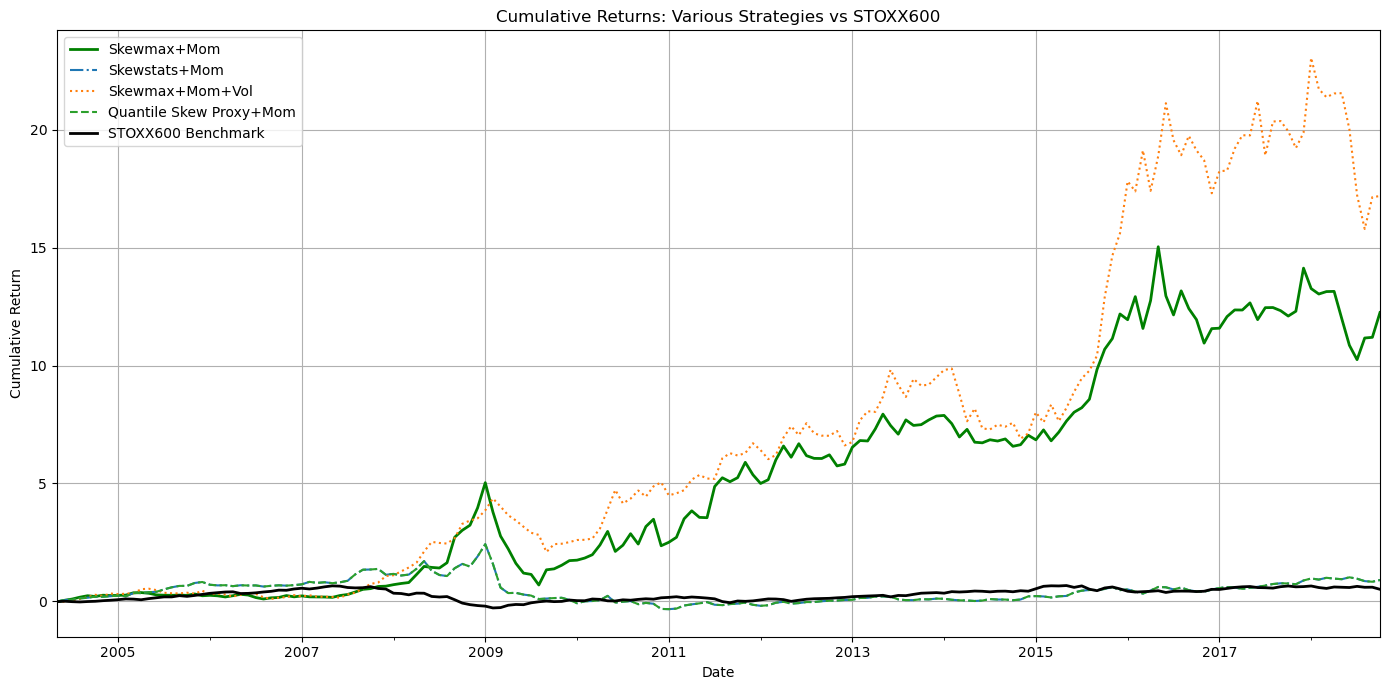

In [ ]:
if not isinstance(results_big_vol_plot.index, pd.PeriodIndex):
    results_big_vol_plot.index = pd.to_datetime(results_big_vol_plot.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

if not isinstance(results_big_plot.index, pd.PeriodIndex):
    results_big_plot.index = pd.to_datetime(results_big_plot.index).to_period('M')

if not isinstance(results_big_quantile.index, pd.PeriodIndex):
    results_big_quantile.index = pd.to_datetime(results_big_quantile.index).to_period('M')

if not isinstance(results_big_monthly_skew.index, pd.PeriodIndex):
    results_big_monthly_skew.index = pd.to_datetime(results_big_monthly_skew.index).to_period('M')

aligned_big = results_big_plot[['cumulative_return']].rename(columns={'cumulative_return': 'Strategy_base'})
aligned_big = aligned_big.join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
).join(
    results_big_monthly_skew[['cumulative_return']].rename(columns={'cumulative_return': 'Strategy_skew'}),
    how='inner'
).join(
    results_big_vol_plot[['cumulative_return']].rename(columns={'cumulative_return': 'Strategy_vol'}),
    how='inner'
).join(
    results_big_quantile[['cumulative_return']].rename(columns={'cumulative_return': 'Strategy_quantile'}),
    how='inner'
)

aligned_big.index = aligned_big.index.to_timestamp()

# Plot
plt.figure(figsize=(14, 7))
aligned_big['Strategy_base'].plot(label='Skewmax+Mom', linewidth=2, color='green')
aligned_big['Strategy_skew'].plot(label='Skewstats+Mom', linewidth=1.5, linestyle='-.')
aligned_big['Strategy_vol'].plot(label='Skewmax+Mom+Vol', linewidth=1.5, linestyle=':')
aligned_big['Strategy_quantile'].plot(label='Quantile Skew Proxy+Mom', linewidth=1.5, linestyle='--')
aligned_big['stoxx600_cumulative_return'].plot(label='STOXX600 Benchmark', linewidth=2, color='black')

plt.title("Cumulative Returns: Various Strategies vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Big Cap

In [26]:
results_big = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=3)

In [27]:
results_big['cumulative_return'] = (1 + results_big['long_short']).cumprod() - 1
results_big

,long_short,cumulative_return
Dates,,
2004-04-30,0.008130,0.008130
2004-05-31,-0.026093,-0.018175
2004-06-30,0.067695,0.048290
2004-07-30,0.050899,0.101647
2004-08-31,0.070824,0.179670
...,...,...
2018-06-29,-0.087021,10.855597
2018-07-31,-0.051367,10.246606
2018-08-31,0.081687,11.165306


In [28]:
stoxx600_returns = pd.read_csv("STOCXX600.csv", index_col = "Dates")
stoxx600_returns.dropna(inplace=True)
stoxx600_returns

,stoxx600_monthly_return,stoxx600_cumulative_return
Dates,,
2004-05-01,-0.008868,-0.008868
2004-06-01,0.016587,0.007572
2004-07-01,-0.018517,-0.011086
2004-08-01,-0.011717,-0.022673
2004-09-01,0.017592,-0.005480
...,...,...
2018-07-01,0.030742,0.638193
2018-08-01,-0.023876,0.599080
2018-09-01,0.002407,0.602928


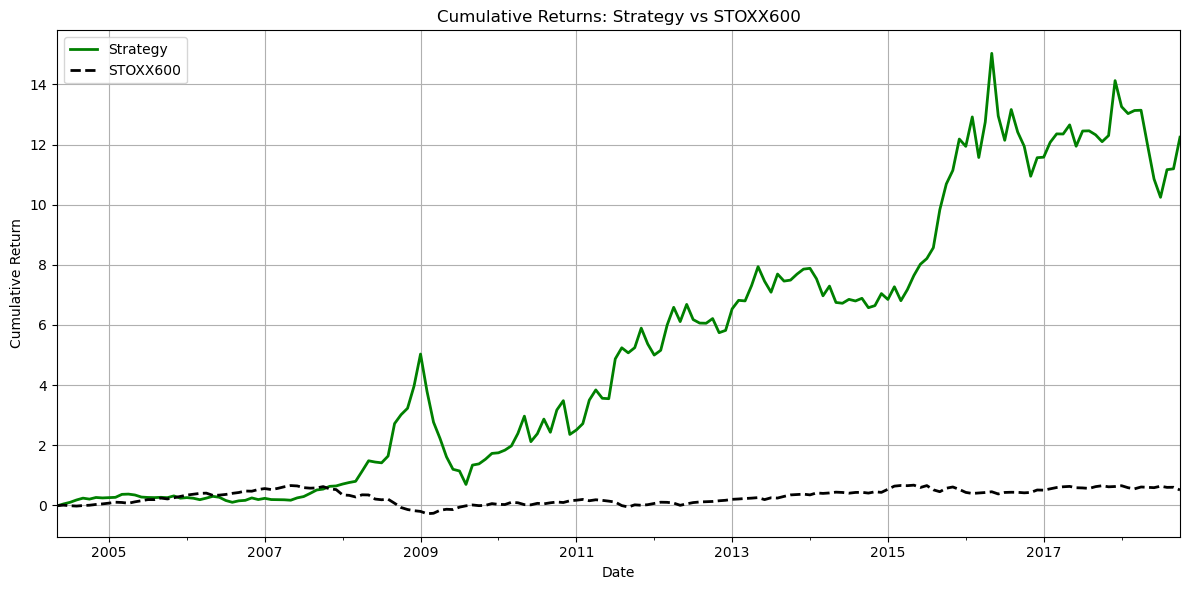

In [29]:
results_big.index = pd.to_datetime(results_big.index).to_period('M')
stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_big = results_big[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_big.index = aligned_big.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_big['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_big['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [30]:
if not isinstance(results_big.index, pd.PeriodIndex):
    results_big.index = pd.to_datetime(results_big.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_big = results_big[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_big.index = df_big.index.to_timestamp()

df_big

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,-0.026093,-0.008868
2004-06-01,0.067695,0.016587
2004-07-01,0.050899,-0.018517
2004-08-01,0.070824,-0.011717
2004-09-01,0.051672,0.017592
...,...,...
2018-06-01,-0.087021,-0.008171
2018-07-01,-0.051367,0.030742
2018-08-01,0.081687,-0.023876


In [31]:
df_3ff = pd.read_csv("Europe_3_Factors.csv", skiprows=3)

df_3ff.rename(columns={df_3ff.columns[0]: "Date"}, inplace=True)

df_3ff = df_3ff[df_3ff['Date'].notna()]
df_3ff['Date'] = df_3ff['Date'].astype(str).str.strip()

df_3ff = df_3ff[df_3ff['Date'].str.match(r'^\d{6}$')]

df_3ff['Date'] = pd.to_datetime(df_3ff['Date'], format='%Y%m')

df_3ff.set_index('Date', inplace=True)

df_3ff = df_3ff.apply(pd.to_numeric, errors='coerce')

df_3ff


,Mkt-RF,SMB,HML,RF
Date,,,,
1990-07-01,4.46,0.29,-1.52,0.68
1990-08-01,-10.88,0.18,-0.30,0.66
1990-09-01,-12.19,1.98,0.44,0.60
1990-10-01,6.45,-2.63,-1.12,0.68
1990-11-01,-0.42,-2.60,0.57,0.57
...,...,...,...,...
2024-12-01,-2.42,1.10,1.61,0.37
2025-01-01,5.83,-3.63,-0.20,0.37
2025-02-01,2.68,-2.76,4.25,0.33


In [32]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_big.index, pd.PeriodIndex):
    df_big.index = pd.to_datetime(df_big.index).to_period('M')

df_big = df_big.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_big.index = df_big.index.to_timestamp()

df_big.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,-0.026093,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.067695,0.016587,1.98,1.11,0.99
2004-07-01,0.050899,-0.018517,-3.12,0.08,0.45
2004-08-01,0.070824,-0.011717,0.37,-0.46,1.32
2004-09-01,0.051672,0.017592,4.01,0.22,0.74


In [33]:
df_bond = pd.read_csv("Germany_3Month_Bond.csv", index_col = "Date")
df_bond.index = pd.PeriodIndex(df_bond.index, freq='M')
df_bond

,bond
Date,
2004-04,2.048750
2004-05,2.085857
2004-06,2.112682
2004-07,2.116045
2004-08,2.114273
...,...
2018-07,-0.320727
2018-08,-0.319000
2018-09,-0.318850


In [34]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_big.index, pd.PeriodIndex):
    df_big.index = pd.to_datetime(df_big.index).to_period('M')

df_big = df_big.join(
    df_bond[['bond']],
    how='inner'
)

df_big.index = df_big.index.to_timestamp()

df_big.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,-0.026093,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,0.067695,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.050899,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.070824,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,0.051672,0.017592,4.01,0.22,0.74,2.118591


In [35]:
results_big = analyze_strategy_metrics(
    df=df_big,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="bond"
)

for metric, value in results_big.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.2744
CAPM t-stat: 3.0015
FF3 alpha: 0.2875
FF3 t-stat: 3.1009
Sharpe ratio (annualized): 0.2196
Sortino ratio (annualized): 0.3420
Information ratio (annualized): 0.5124
Annualized volatility: 0.3156
Downside volatility (annualized): 0.2003
Max drawdown: -0.7189


## With volatility strategy

In [36]:
results_big_vol = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=12,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=3,                      # solo large cap
    vol_window=6,                     # rolling window di 6 mesi
    target_annual_vol=0.22            # target volatility annualizzata
)

In [37]:
results_big_vol['cumulative_return'] = (1 + results_big_vol['long_short_scaled']).cumprod() - 1
results_big_vol

,long_short_scaled,cumulative_return
2004-05-31,0.008130,0.008130
2004-06-30,-0.026093,-0.018175
2004-07-30,0.067695,0.048290
2004-08-31,0.050899,0.101647
2004-09-30,0.070824,0.179670
...,...,...
2018-07-31,-0.132381,17.228286
2018-08-31,-0.079004,15.788170
2018-09-28,0.080462,17.138987
2018-10-31,0.002366,17.181898


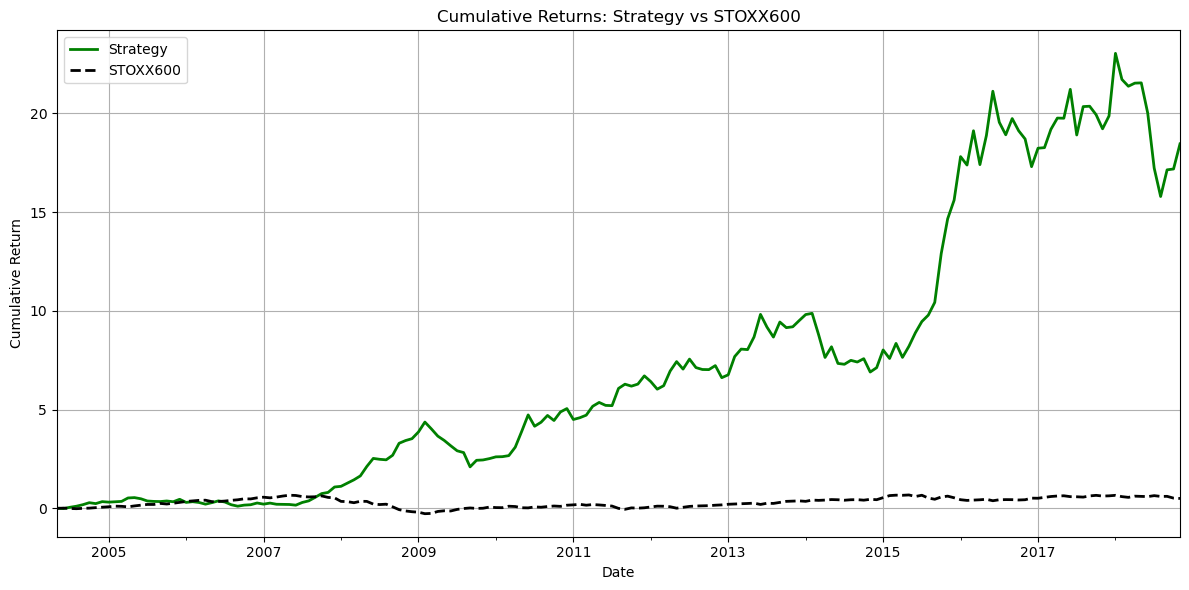

In [38]:
if not isinstance(results_big_vol.index, pd.PeriodIndex):
    results_big_vol.index = pd.to_datetime(results_big_vol.index).to_period('M')
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_big_vol = results_big_vol[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_big_vol.index = aligned_big_vol.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_big_vol['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_big_vol['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
if not isinstance(results_big_vol.index, pd.PeriodIndex):
    results_big_vol.index = pd.to_datetime(results_big_vol.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_big_vol = results_big_vol[['long_short_scaled']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_big_vol.index = df_big_vol.index.to_timestamp()

df_big_vol

,long_short_scaled,stoxx600_monthly_return
2004-05-01,0.008130,-0.008868
2004-06-01,-0.026093,0.016587
2004-07-01,0.067695,-0.018517
2004-08-01,0.050899,-0.011717
2004-09-01,0.070824,0.017592
...,...,...
2018-07-01,-0.132381,0.030742
2018-08-01,-0.079004,-0.023876
2018-09-01,0.080462,0.002407
2018-10-01,0.002366,-0.056292


In [40]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_big_vol.index, pd.PeriodIndex):
    df_big_vol.index = pd.to_datetime(df_big_vol.index).to_period('M')

df_big_vol = df_big_vol.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_big_vol.index = df_big_vol.index.to_timestamp()

df_big_vol.head()


,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.008130,-0.008868,1.42,-1.01,-0.89
2004-06-01,-0.026093,0.016587,1.98,1.11,0.99
2004-07-01,0.067695,-0.018517,-3.12,0.08,0.45
2004-08-01,0.050899,-0.011717,0.37,-0.46,1.32
2004-09-01,0.070824,0.017592,4.01,0.22,0.74


In [41]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_big_vol.index, pd.PeriodIndex):
    df_big_vol.index = pd.to_datetime(df_big_vol.index).to_period('M')

df_big_vol = df_big_vol.join(
    df_bond[['bond']],
    how='inner'
)

df_big_vol.index = df_big_vol.index.to_timestamp()

df_big_vol.head()

,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,0.008130,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,-0.026093,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.067695,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.050899,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,0.070824,0.017592,4.01,0.22,0.74,2.118591


In [42]:
results_big_vol = analyze_strategy_metrics(
    df=df_big_vol,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short_scaled',
    rf_col="bond"
)

for metric, value in results_big_vol.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.2892
CAPM t-stat: 4.2337
FF3 alpha: 0.2879
FF3 t-stat: 4.4181
Sharpe ratio (annualized): 0.3194
Sortino ratio (annualized): 0.5816
Information ratio (annualized): 0.6217
Annualized volatility: 0.2445
Downside volatility (annualized): 0.1326
Max drawdown: -0.4231


## Momentum only

In [43]:
results_big_mom = run_momentum_strategy(df_prices, df_weights, start_date="2004-04-01", end_date="2018-11-30", x=12,
                          momentum_pct=0.2, cap_level=3)

In [44]:
results_big_mom['cumulative_return'] = (1 + results_big_mom['long_short']).cumprod() - 1
results_big_mom

,long_short,cumulative_return
Dates,,
2004-04-30,0.027387,0.027387
2004-05-31,-0.096767,-0.072030
2004-06-30,-0.006846,-0.078384
2004-07-30,0.008847,-0.070230
2004-08-31,0.048194,-0.025421
...,...,...
2018-06-29,-0.035599,2.008310
2018-07-31,-0.003747,1.997037
2018-08-31,0.029690,2.086018


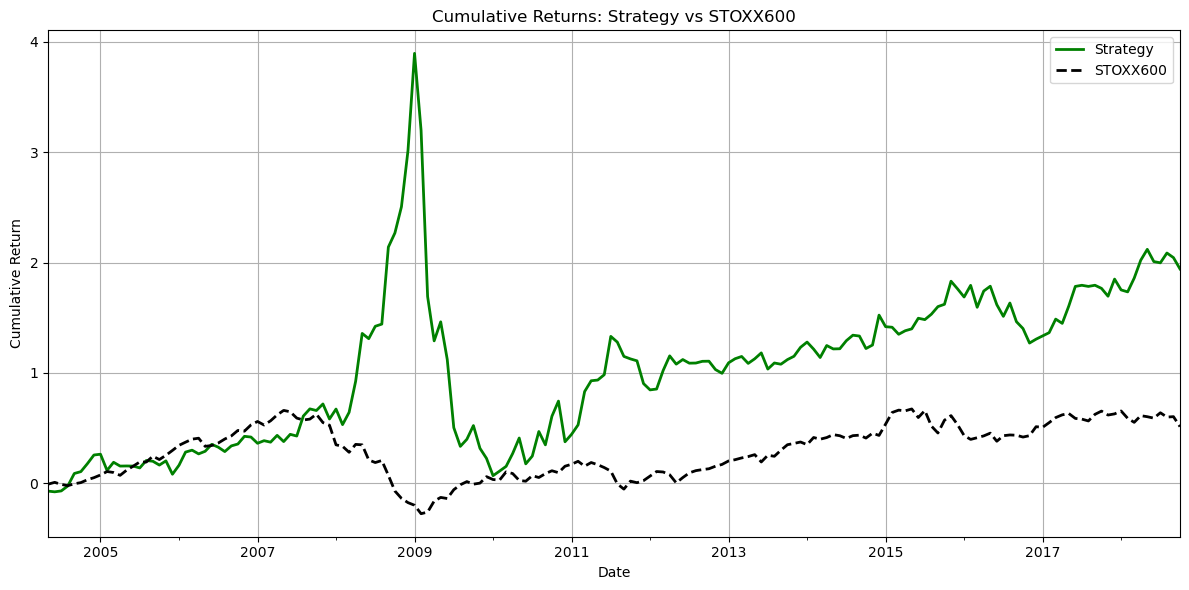

In [45]:
if not isinstance(results_big_mom.index, pd.PeriodIndex):
    results_big_mom.index = pd.to_datetime(results_big_mom.index).to_period('M')
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_big_mom = results_big_mom[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_big_mom.index = aligned_big_mom.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_big_mom['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_big_mom['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [46]:
if not isinstance(results_big_mom.index, pd.PeriodIndex):
    results_big_mom.index = pd.to_datetime(results_big_mom.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_big_mom = results_big_mom[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_big_mom.index = df_big_mom.index.to_timestamp()

df_big_mom

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,-0.096767,-0.008868
2004-06-01,-0.006846,0.016587
2004-07-01,0.008847,-0.018517
2004-08-01,0.048194,-0.011717
2004-09-01,0.116336,0.017592
...,...,...
2018-06-01,-0.035599,-0.008171
2018-07-01,-0.003747,0.030742
2018-08-01,0.029690,-0.023876


In [47]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_big_mom.index, pd.PeriodIndex):
    df_big_mom.index = pd.to_datetime(df_big_mom.index).to_period('M')

df_big_mom = df_big_mom.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_big_mom.index = df_big_mom.index.to_timestamp()

df_big_mom.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,-0.096767,-0.008868,1.42,-1.01,-0.89
2004-06-01,-0.006846,0.016587,1.98,1.11,0.99
2004-07-01,0.008847,-0.018517,-3.12,0.08,0.45
2004-08-01,0.048194,-0.011717,0.37,-0.46,1.32
2004-09-01,0.116336,0.017592,4.01,0.22,0.74


In [48]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_big_mom.index, pd.PeriodIndex):
    df_big_mom.index = pd.to_datetime(df_big_mom.index).to_period('M')

df_big_mom = df_big_mom.join(
    df_bond[['bond']],
    how='inner'
)

df_big_mom.index = df_big_mom.index.to_timestamp()

df_big_mom.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,-0.096767,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,-0.006846,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.008847,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.048194,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,0.116336,0.017592,4.01,0.22,0.74,2.118591


In [49]:
results_big_mom = analyze_strategy_metrics(
    df=df_big_mom,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="bond"
)

for metric, value in results_big_mom.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.1384
CAPM t-stat: 1.8293
FF3 alpha: 0.1359
FF3 t-stat: 1.7701
Sharpe ratio (annualized): -0.1682
Sortino ratio (annualized): -0.2077
Information ratio (annualized): 0.2214
Annualized volatility: 0.2772
Downside volatility (annualized): 0.2214
Max drawdown: -0.7818


# Med Cap

In [50]:
results_med = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=2)

In [51]:
results_med['cumulative_return'] = (1 + results_med['long_short']).cumprod() - 1
results_med

,long_short,cumulative_return
Dates,,
2004-04-30,0.004266,0.004266
2004-05-31,0.100041,0.104734
2004-06-30,0.091828,0.206179
2004-07-30,0.044682,0.260074
2004-08-31,0.014985,0.278956
...,...,...
2018-06-29,-0.044673,11.384244
2018-07-31,0.074925,12.312134
2018-08-31,-0.006142,12.230374


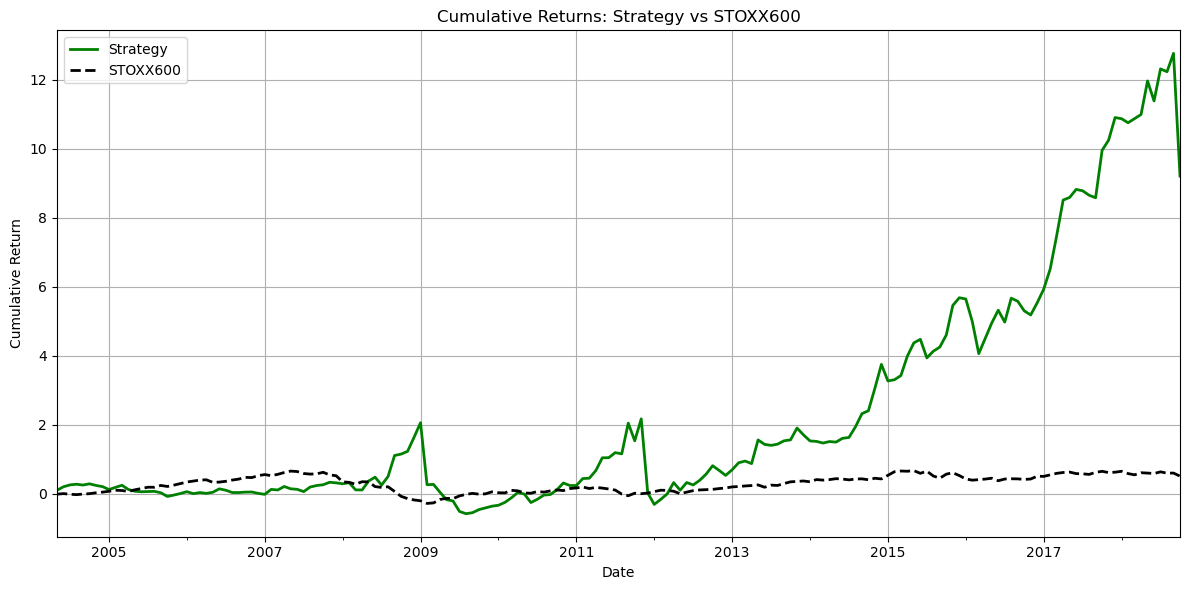

In [52]:
results_med.index = pd.to_datetime(results_med.index).to_period('M')
#stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_med = results_med[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_med.index = aligned_med.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_med['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_med['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [53]:
if not isinstance(results_med.index, pd.PeriodIndex):
    results_med.index = pd.to_datetime(results_med.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_med = results_med[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_med.index = df_med.index.to_timestamp()

df_med

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,0.100041,-0.008868
2004-06-01,0.091828,0.016587
2004-07-01,0.044682,-0.018517
2004-08-01,0.014985,-0.011717
2004-09-01,-0.018072,0.017592
...,...,...
2018-06-01,-0.044673,-0.008171
2018-07-01,0.074925,0.030742
2018-08-01,-0.006142,-0.023876


In [54]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_med.index, pd.PeriodIndex):
    df_med.index = pd.to_datetime(df_med.index).to_period('M')

df_med = df_med.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_med.index = df_med.index.to_timestamp()

df_med.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.100041,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.091828,0.016587,1.98,1.11,0.99
2004-07-01,0.044682,-0.018517,-3.12,0.08,0.45
2004-08-01,0.014985,-0.011717,0.37,-0.46,1.32
2004-09-01,-0.018072,0.017592,4.01,0.22,0.74


In [55]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_med.index, pd.PeriodIndex):
    df_med.index = pd.to_datetime(df_med.index).to_period('M')

df_med = df_med.join(
    df_bond[['bond']],
    how='inner'
)

df_med.index = df_med.index.to_timestamp()

df_med.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,0.100041,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,0.091828,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.044682,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.014985,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,-0.018072,0.017592,4.01,0.22,0.74,2.118591


In [56]:
results_med = analyze_strategy_metrics(
    df=df_med,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="bond"
)

for metric, value in results_med.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.3483
CAPM t-stat: 2.4656
FF3 alpha: 0.3600
FF3 t-stat: 2.5237
Sharpe ratio (annualized): 0.2858
Sortino ratio (annualized): 0.3273
Information ratio (annualized): 0.5140
Annualized volatility: 0.4659
Downside volatility (annualized): 0.4102
Max drawdown: -0.8611


## With volatility strategy

In [57]:
results_med_vol = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=12,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=2,                      # solo mid cap
    vol_window=6,                     # rolling window di 6 mesi
    target_annual_vol=0.22            # target volatility annualizzata
)

In [58]:
results_med_vol['cumulative_return'] = (1 + results_med_vol['long_short_scaled']).cumprod() - 1
results_med_vol

,long_short_scaled,cumulative_return
2004-05-31,0.004266,0.004266
2004-06-30,0.100041,0.104734
2004-07-30,0.091828,0.206179
2004-08-31,0.044682,0.260074
2004-09-30,0.014985,0.278956
...,...,...
2018-07-31,-0.068546,21.965493
2018-08-31,0.097038,24.194007
2018-09-28,-0.008025,23.991828
2018-10-31,0.052331,25.299686


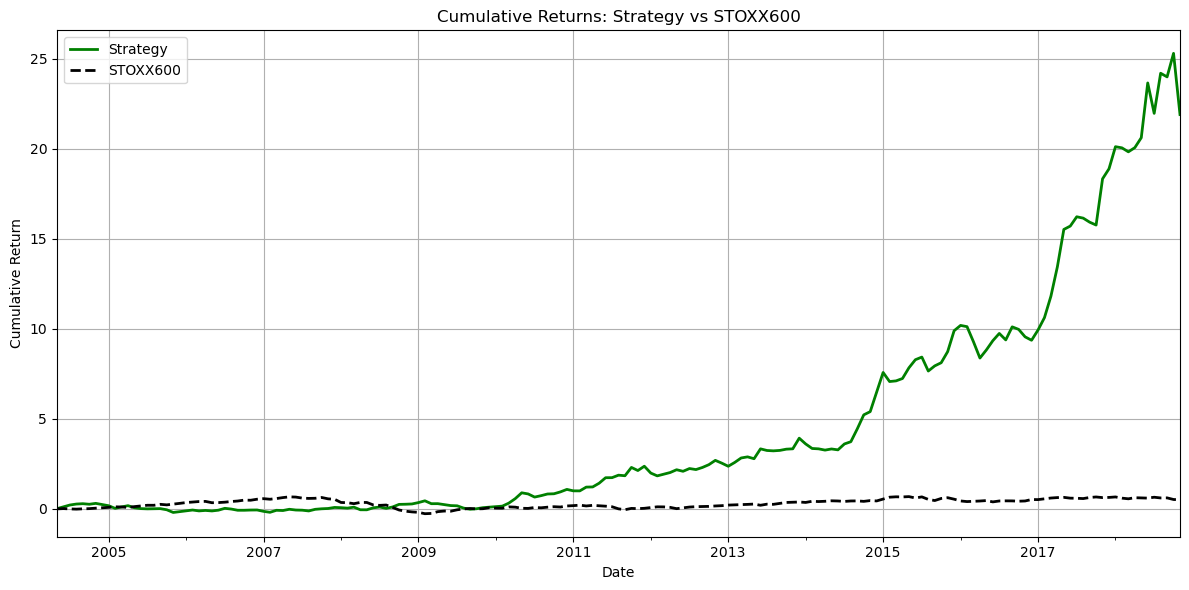

In [59]:
if not isinstance(results_med_vol.index, pd.PeriodIndex):
    results_med_vol.index = pd.to_datetime(results_med_vol.index).to_period('M')
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_med_vol = results_med_vol[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_med_vol.index = aligned_med_vol.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_med_vol['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_med_vol['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [60]:
if not isinstance(results_med_vol.index, pd.PeriodIndex):
    results_med_vol.index = pd.to_datetime(results_med_vol.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_med_vol = results_med_vol[['long_short_scaled']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_med_vol.index = df_med_vol.index.to_timestamp()

df_med_vol

,long_short_scaled,stoxx600_monthly_return
2004-05-01,0.004266,-0.008868
2004-06-01,0.100041,0.016587
2004-07-01,0.091828,-0.018517
2004-08-01,0.044682,-0.011717
2004-09-01,0.014985,0.017592
...,...,...
2018-07-01,-0.068546,0.030742
2018-08-01,0.097038,-0.023876
2018-09-01,-0.008025,0.002407
2018-10-01,0.052331,-0.056292


In [61]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_med_vol.index, pd.PeriodIndex):
    df_med_vol.index = pd.to_datetime(df_med_vol.index).to_period('M')

df_med_vol = df_med_vol.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_med_vol.index = df_med_vol.index.to_timestamp()

df_med_vol.head()


,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.004266,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.100041,0.016587,1.98,1.11,0.99
2004-07-01,0.091828,-0.018517,-3.12,0.08,0.45
2004-08-01,0.044682,-0.011717,0.37,-0.46,1.32
2004-09-01,0.014985,0.017592,4.01,0.22,0.74


In [62]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_med_vol.index, pd.PeriodIndex):
    df_med_vol.index = pd.to_datetime(df_med_vol.index).to_period('M')

df_med_vol = df_med_vol.join(
    df_bond[['bond']],
    how='inner'
)

df_med_vol.index = df_med_vol.index.to_timestamp()

df_med_vol.head()

,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,0.004266,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,0.100041,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.091828,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.044682,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,0.014985,0.017592,4.01,0.22,0.74,2.118591


In [63]:
results_med_vol = analyze_strategy_metrics(
    df=df_med_vol,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short_scaled',
    rf_col="bond"
)

for metric, value in results_med_vol.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.2923
CAPM t-stat: 4.2356
FF3 alpha: 0.2877
FF3 t-stat: 4.3320
Sharpe ratio (annualized): 0.3476
Sortino ratio (annualized): 0.5954
Information ratio (annualized): 0.6893
Annualized volatility: 0.2386
Downside volatility (annualized): 0.1462
Max drawdown: -0.3894


## Momentum only

In [64]:
results_med_mom = run_momentum_strategy(df_prices, df_weights, start_date="2004-04-01", end_date="2018-11-30", x=12,
                          momentum_pct=0.2, cap_level=2)

In [65]:
results_med_mom['cumulative_return'] = (1 + results_med_mom['long_short']).cumprod() - 1
results_med_mom

,long_short,cumulative_return
Dates,,
2004-04-30,-0.031880,-0.031880
2004-05-31,0.019907,-0.012607
2004-06-30,0.104511,0.090586
2004-07-30,-0.012467,0.076989
2004-08-31,0.120011,0.206240
...,...,...
2018-06-29,-0.013270,4.269610
2018-07-31,0.042847,4.495396
2018-08-31,-0.034183,4.307545


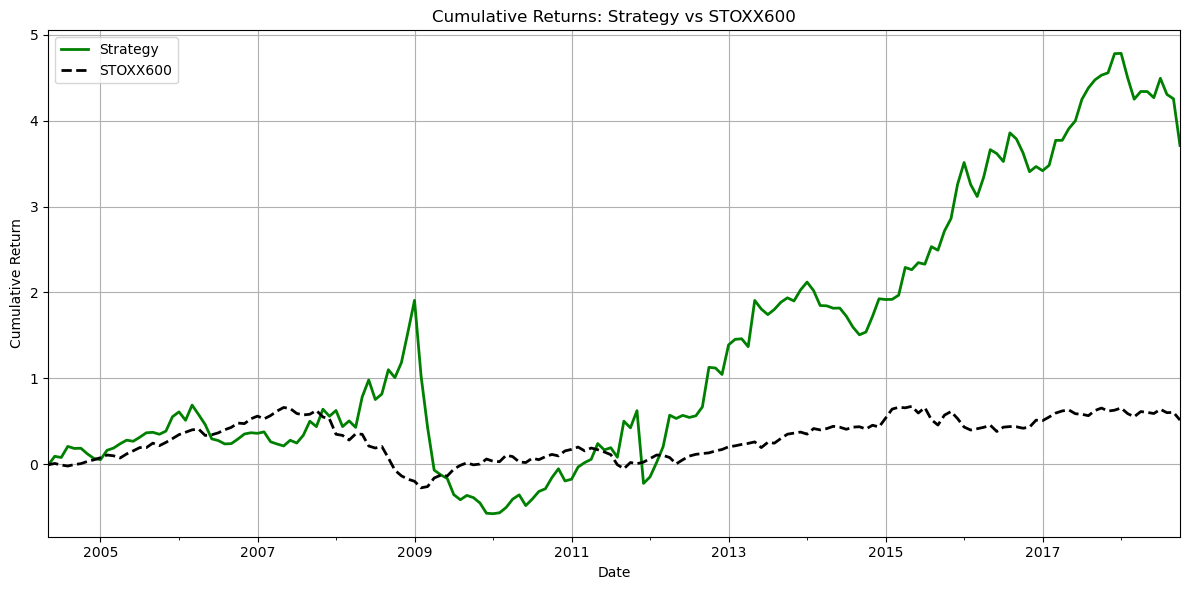

In [66]:
if not isinstance(results_med_mom.index, pd.PeriodIndex):
    results_med_mom.index = pd.to_datetime(results_med_mom.index).to_period('M')
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_med_mom = results_med_mom[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_med_mom.index = aligned_med_mom.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_med_mom['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_med_mom['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [67]:
if not isinstance(results_med_mom.index, pd.PeriodIndex):
    results_med_mom.index = pd.to_datetime(results_med_mom.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_med_mom = results_med_mom[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_med_mom.index = df_med_mom.index.to_timestamp()

df_med_mom

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,0.019907,-0.008868
2004-06-01,0.104511,0.016587
2004-07-01,-0.012467,-0.018517
2004-08-01,0.120011,-0.011717
2004-09-01,-0.019960,0.017592
...,...,...
2018-06-01,-0.013270,-0.008171
2018-07-01,0.042847,0.030742
2018-08-01,-0.034183,-0.023876


In [68]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_med_mom.index, pd.PeriodIndex):
    df_med_mom.index = pd.to_datetime(df_med_mom.index).to_period('M')

df_med_mom = df_med_mom.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_med_mom.index = df_med_mom.index.to_timestamp()

df_med_mom.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.019907,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.104511,0.016587,1.98,1.11,0.99
2004-07-01,-0.012467,-0.018517,-3.12,0.08,0.45
2004-08-01,0.120011,-0.011717,0.37,-0.46,1.32
2004-09-01,-0.019960,0.017592,4.01,0.22,0.74


In [69]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_med_mom.index, pd.PeriodIndex):
    df_med_mom.index = pd.to_datetime(df_med_mom.index).to_period('M')

df_med_mom = df_med_mom.join(
    df_bond[['bond']],
    how='inner'
)

df_med_mom.index = df_med_mom.index.to_timestamp()

df_med_mom.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,0.019907,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,0.104511,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,-0.012467,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.120011,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,-0.019960,0.017592,4.01,0.22,0.74,2.118591


In [70]:
results_med_mom = analyze_strategy_metrics(
    df=df_med_mom,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="bond"
)

for metric, value in results_med_mom.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.2170
CAPM t-stat: 2.0589
FF3 alpha: 0.2080
FF3 t-stat: 1.9451
Sharpe ratio (annualized): 0.0664
Sortino ratio (annualized): 0.0799
Information ratio (annualized): 0.3531
Annualized volatility: 0.3679
Downside volatility (annualized): 0.3082
Max drawdown: -0.8549


# Small Cap

In [71]:
results_small = run_skew_momentum_strategy(df_prices, df_weights, df_daily,
                                     start_date="2004-04-01", end_date="2018-11-30", x=12,
                                     skew_pct=0.2, momentum_pct=0.2, cap_level=1)

In [72]:
results_small['cumulative_return'] = (1 + results_small['long_short']).cumprod() - 1
results_small

,long_short,cumulative_return
Dates,,
2004-04-30,-0.035679,-0.035679
2004-05-31,0.040094,0.002984
2004-06-30,0.065888,0.069069
2004-07-30,-0.001360,0.067615
2004-08-31,0.010490,0.078815
...,...,...
2018-06-29,-0.232051,1.983394
2018-07-31,0.031392,2.077050
2018-08-31,-0.221526,1.395403


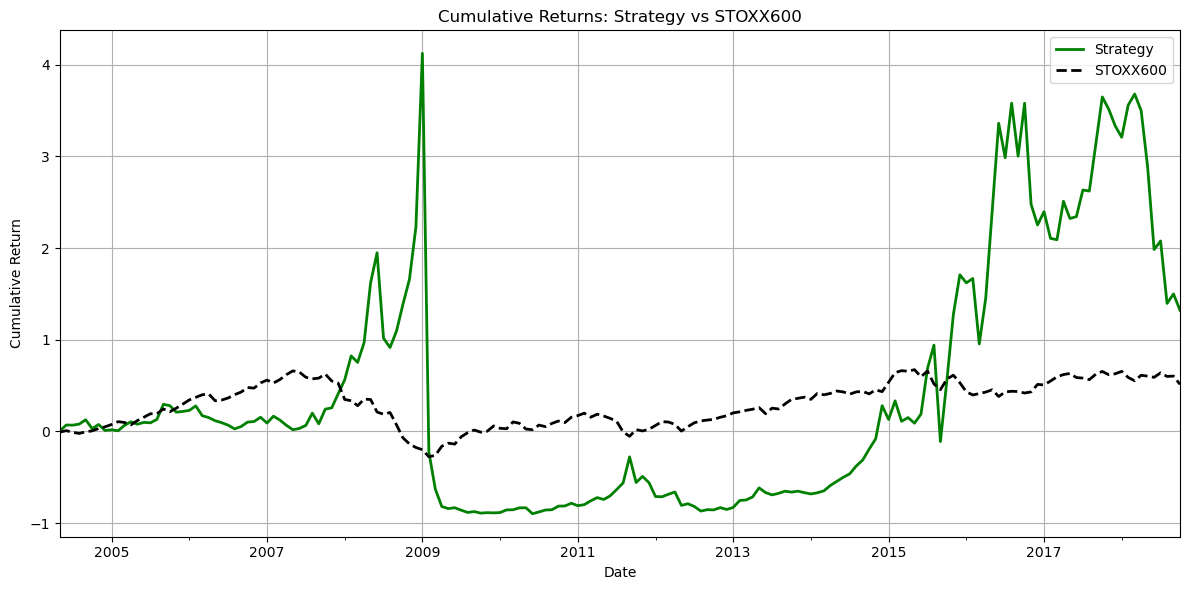

In [73]:
if not isinstance(results_small.index, pd.PeriodIndex):
    results_small.index = pd.to_datetime(results_small.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_small = results_small[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_small.index = aligned_small.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_small['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_small['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
if not isinstance(results_small.index, pd.PeriodIndex):
    results_small.index = pd.to_datetime(results_small.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_small= results_small[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_small.index = df_small.index.to_timestamp()

df_small

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,0.040094,-0.008868
2004-06-01,0.065888,0.016587
2004-07-01,-0.001360,-0.018517
2004-08-01,0.010490,-0.011717
2004-09-01,0.043873,0.017592
...,...,...
2018-06-01,-0.232051,-0.008171
2018-07-01,0.031392,0.030742
2018-08-01,-0.221526,-0.023876


In [75]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_small.index, pd.PeriodIndex):
    df_small.index = pd.to_datetime(df_small.index).to_period('M')

df_small = df_small.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_small.index = df_small.index.to_timestamp()

df_small.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.040094,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.065888,0.016587,1.98,1.11,0.99
2004-07-01,-0.001360,-0.018517,-3.12,0.08,0.45
2004-08-01,0.010490,-0.011717,0.37,-0.46,1.32
2004-09-01,0.043873,0.017592,4.01,0.22,0.74


In [76]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_small.index, pd.PeriodIndex):
    df_small.index = pd.to_datetime(df_small.index).to_period('M')

df_small = df_small.join(
    df_bond[['bond']],
    how='inner'
)

df_small.index = df_small.index.to_timestamp()

df_small.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,0.040094,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,0.065888,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,-0.001360,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,0.010490,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,0.043873,0.017592,4.01,0.22,0.74,2.118591


In [77]:
results_small = analyze_strategy_metrics(
    df=df_small,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="bond"
)

for metric, value in results_small.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.4169
CAPM t-stat: 1.9817
FF3 alpha: 0.4411
FF3 t-stat: 2.0719
Sharpe ratio (annualized): 0.2707
Sortino ratio (annualized): 0.3442
Information ratio (annualized): 0.4360
Annualized volatility: 0.6765
Downside volatility (annualized): 0.5344
Max drawdown: -0.9802


## With volatility strategy

In [78]:
results_small_vol = run_skew_momentum_strategy_vol(
    df_prices=df_prices,         # prezzi mensili con indice datetime
    df_weights=df_weights,       # capitalizzazioni/pesi mensili
    df_daily=df_daily,            # prezzi giornalieri (usati per skew)
    start_date="2004-04-01",
    end_date="2018-11-30",
    x=12,                             # momentum da t-12 a t-2
    skew_pct=0.2,                     # prendi bottom/top 20% skew
    momentum_pct=0.2,                 # prendi top/bottom 20% momentum
    cap_level=1,                      # solo mid cap
    vol_window=6,                     # rolling window di 6 mesi
    target_annual_vol=0.22            # target volatility annualizzata
)

In [79]:
results_small_vol['cumulative_return'] = (1 + results_small_vol['long_short_scaled']).cumprod() - 1
results_small_vol

,long_short_scaled,cumulative_return
2004-05-31,-0.035679,-0.035679
2004-06-30,0.040094,0.002984
2004-07-30,0.065888,0.069069
2004-08-31,-0.001360,0.067615
2004-09-30,0.010490,0.078815
...,...,...
2018-07-31,-0.129488,29.305540
2018-08-31,0.016749,29.813121
2018-09-28,-0.118547,26.160305
2018-10-31,0.022485,26.771010


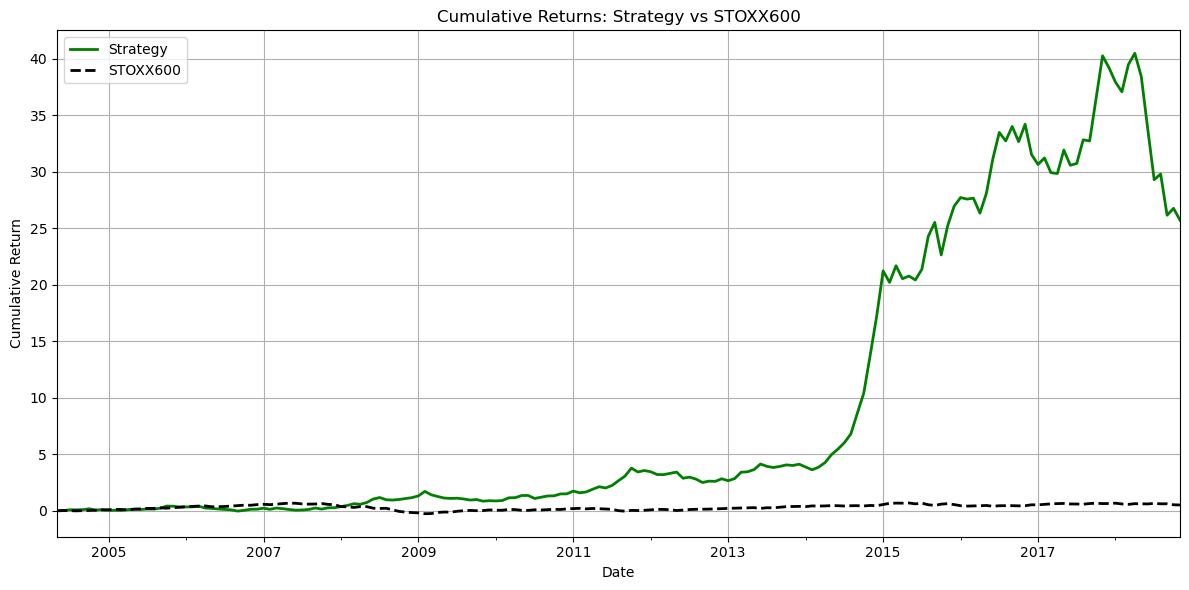

In [80]:
if not isinstance(results_small_vol.index, pd.PeriodIndex):
    results_small_vol.index = pd.to_datetime(results_small_vol.index).to_period('M')
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_small_vol = results_small_vol[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_small_vol.index = aligned_small_vol.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_small_vol['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_small_vol['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [81]:
if not isinstance(results_small_vol.index, pd.PeriodIndex):
    results_small_vol.index = pd.to_datetime(results_small_vol.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_small_vol = results_small_vol[['long_short_scaled']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_small_vol.index = df_small_vol.index.to_timestamp()

df_small_vol

,long_short_scaled,stoxx600_monthly_return
2004-05-01,-0.035679,-0.008868
2004-06-01,0.040094,0.016587
2004-07-01,0.065888,-0.018517
2004-08-01,-0.001360,-0.011717
2004-09-01,0.010490,0.017592
...,...,...
2018-07-01,-0.129488,0.030742
2018-08-01,0.016749,-0.023876
2018-09-01,-0.118547,0.002407
2018-10-01,0.022485,-0.056292


In [82]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_small_vol.index, pd.PeriodIndex):
    df_small_vol.index = pd.to_datetime(df_small_vol.index).to_period('M')

df_small_vol = df_small_vol.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_small_vol.index = df_small_vol.index.to_timestamp()

df_small_vol.head()


,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,-0.035679,-0.008868,1.42,-1.01,-0.89
2004-06-01,0.040094,0.016587,1.98,1.11,0.99
2004-07-01,0.065888,-0.018517,-3.12,0.08,0.45
2004-08-01,-0.001360,-0.011717,0.37,-0.46,1.32
2004-09-01,0.010490,0.017592,4.01,0.22,0.74


In [83]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_small_vol.index, pd.PeriodIndex):
    df_small_vol.index = pd.to_datetime(df_small_vol.index).to_period('M')

df_small_vol = df_small_vol.join(
    df_bond[['bond']],
    how='inner'
)

df_small_vol.index = df_small_vol.index.to_timestamp()

df_small_vol.head()

,long_short_scaled,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,-0.035679,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,0.040094,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.065888,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,-0.001360,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,0.010490,0.017592,4.01,0.22,0.74,2.118591


In [84]:
results_small_vol = analyze_strategy_metrics(
    df=df_small_vol,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short_scaled',
    rf_col="bond"
)

for metric, value in results_small_vol.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.3166
CAPM t-stat: 4.1651
FF3 alpha: 0.3184
FF3 t-stat: 4.3217
Sharpe ratio (annualized): 0.3840
Sortino ratio (annualized): 0.7475
Information ratio (annualized): 0.6874
Annualized volatility: 0.2622
Downside volatility (annualized): 0.1377
Max drawdown: -0.3560


## Momentum only

In [85]:
results_small_mom = run_momentum_strategy(df_prices, df_weights, start_date="2004-04-01", end_date="2018-11-30", x=12,
                          momentum_pct=0.2, cap_level=1)

In [86]:
results_small_mom['cumulative_return'] = (1 + results_small_mom['long_short']).cumprod() - 1
results_small_mom

,long_short,cumulative_return
Dates,,
2004-04-30,0.048089,0.048089
2004-05-31,0.033449,0.083146
2004-06-30,-0.064789,0.012970
2004-07-30,0.028656,0.041998
2004-08-31,-0.026979,0.013886
...,...,...
2018-06-29,0.054007,13.773461
2018-07-31,0.040716,14.374976
2018-08-31,-0.106748,12.733734


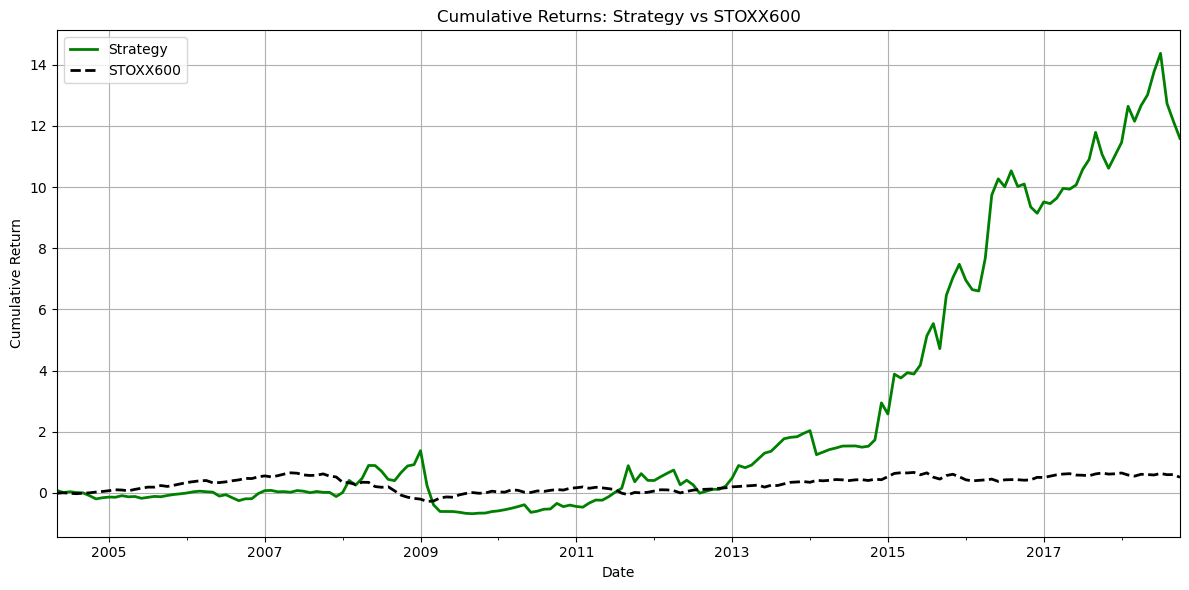

In [87]:
if not isinstance(results_small_mom.index, pd.PeriodIndex):
    results_small_mom.index = pd.to_datetime(results_small_mom.index).to_period('M')
if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

aligned_small_mom = results_small_mom[['cumulative_return']].join(
    stoxx600_returns[['stoxx600_cumulative_return']],
    how='inner'
)

aligned_small_mom.index = aligned_small_mom.index.to_timestamp()

# Plot
plt.figure(figsize=(12, 6))
aligned_small_mom['cumulative_return'].plot(label='Strategy', linewidth=2, color='green')
aligned_small_mom['stoxx600_cumulative_return'].plot(label='STOXX600', linewidth=2, linestyle='--', color='black')

plt.title("Cumulative Returns: Strategy vs STOXX600")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [88]:
if not isinstance(results_small_mom.index, pd.PeriodIndex):
    results_small_mom.index = pd.to_datetime(results_small_mom.index).to_period('M')

if not isinstance(stoxx600_returns.index, pd.PeriodIndex):
    stoxx600_returns.index = pd.to_datetime(stoxx600_returns.index).to_period('M')

df_small_mom = results_small_mom[['long_short']].join(
    stoxx600_returns[['stoxx600_monthly_return']],
    how='inner'
)

df_small_mom.index = df_small_mom.index.to_timestamp()

df_small_mom

,long_short,stoxx600_monthly_return
Dates,,
2004-05-01,0.033449,-0.008868
2004-06-01,-0.064789,0.016587
2004-07-01,0.028656,-0.018517
2004-08-01,-0.026979,-0.011717
2004-09-01,-0.009723,0.017592
...,...,...
2018-06-01,0.054007,-0.008171
2018-07-01,0.040716,0.030742
2018-08-01,-0.106748,-0.023876


In [89]:
if not isinstance(df_3ff.index, pd.PeriodIndex):
    df_3ff.index = df_3ff.index.to_period('M')

if not isinstance(df_small_mom.index, pd.PeriodIndex):
    df_small_mom.index = pd.to_datetime(df_small_mom.index).to_period('M')

df_small_mom = df_small_mom.join(
    df_3ff[['Mkt-RF', 'SMB', 'HML']],
    how='inner'
)

df_small_mom.index = df_small_mom.index.to_timestamp()

df_small_mom.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML
2004-05-01,0.033449,-0.008868,1.42,-1.01,-0.89
2004-06-01,-0.064789,0.016587,1.98,1.11,0.99
2004-07-01,0.028656,-0.018517,-3.12,0.08,0.45
2004-08-01,-0.026979,-0.011717,0.37,-0.46,1.32
2004-09-01,-0.009723,0.017592,4.01,0.22,0.74


In [90]:
if not isinstance(df_bond.index, pd.PeriodIndex):
    df_bond.index = df_bond.index.to_period('M')

if not isinstance(df_small_mom.index, pd.PeriodIndex):
    df_small_mom.index = pd.to_datetime(df_small_mom.index).to_period('M')

df_small_mom = df_small_mom.join(
    df_bond[['bond']],
    how='inner'
)

df_small_mom.index = df_small_mom.index.to_timestamp()

df_small_mom.head()


,long_short,stoxx600_monthly_return,Mkt-RF,SMB,HML,bond
2004-05-01,0.033449,-0.008868,1.42,-1.01,-0.89,2.085857
2004-06-01,-0.064789,0.016587,1.98,1.11,0.99,2.112682
2004-07-01,0.028656,-0.018517,-3.12,0.08,0.45,2.116045
2004-08-01,-0.026979,-0.011717,0.37,-0.46,1.32,2.114273
2004-09-01,-0.009723,0.017592,4.01,0.22,0.74,2.118591


In [91]:
results_small_mom = analyze_strategy_metrics(
    df=df_small_mom,
    market_col='stoxx600_monthly_return',
    strategy_col='long_short',
    rf_col="bond"
)

for metric, value in results_small_mom.items():
    print(f"{metric}: {value:.4f}" if isinstance(value, (float, int)) else f"{metric}: {value}")


CAPM alpha: 0.3476
CAPM t-stat: 2.3765
FF3 alpha: 0.3405
FF3 t-stat: 2.3239
Sharpe ratio (annualized): 0.2770
Sortino ratio (annualized): 0.3594
Information ratio (annualized): 0.5009
Annualized volatility: 0.4821
Downside volatility (annualized): 0.3751
Max drawdown: -0.8645


# General comparison

In [92]:
records = []

for group, label, result in [
    ('small', 'base', results_small_mom),
    ('small', 'skew+mom', results_small),
    ('small', 'skew+mom+vol', results_small_vol),
    ('medium', 'base', results_med_mom),
    ('medium', 'skew+mom', results_med),
    ('medium', 'skew+mom+vol', results_med_vol),
    ('big', 'base', results_big_mom),
    ('big', 'skew+mom', results_big),
    ('big', 'skew+mom+vol', results_big_vol),
]:
    row = {'group': group, 'type': label}
    row.update(result)
    records.append(row)

df_summary = pd.DataFrame(records)

df_summary

,group,type,CAPM alpha,CAPM t-stat,FF3 alpha,FF3 t-stat,Sharpe ratio (annualized),Sortino ratio (annualized),Information ratio (annualized),Annualized volatility,Downside volatility (annualized),Max drawdown
0,small,base,0.347616,2.376523,0.340509,2.323858,0.276976,0.359447,0.500880,0.482093,0.375128,-0.864536
1,small,skew+mom,0.416947,1.981672,0.441057,2.071882,0.270725,0.344232,0.436018,0.676536,0.534422,-0.980198
2,small,skew+mom+vol,0.316643,4.165113,0.318361,4.321651,0.383962,0.747470,0.687397,0.262158,0.137674,-0.355986
3,medium,base,0.217029,2.058933,0.208050,1.945057,0.066363,0.079933,0.353123,0.367950,0.308190,-0.854906
4,medium,skew+mom,0.348340,2.465555,0.360044,2.523723,0.285788,0.327277,0.514004,0.465900,0.410204,-0.861077
5,medium,skew+mom+vol,0.292308,4.235581,0.287749,4.331989,0.347620,0.595374,0.689305,0.238640,0.146159,-0.389439
6,big,base,0.138434,1.829306,0.135945,1.770082,-0.168166,-0.207653,0.221384,0.277247,0.221388,-0.781836
7,big,skew+mom,0.274420,3.001510,0.287484,3.100920,0.219600,0.342000,0.512367,0.315575,0.200313,-0.718853
8,big,skew+mom+vol,0.289242,4.233662,0.287857,4.418119,0.319357,0.581628,0.621709,0.244484,0.132559,-0.423058


# Data Sources

- **Fama-French 3 Factors (International)**:  
  [Ken French Data Library – International Factors](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html#International)

- **German 3-Month Government Bonds (Interbank Rate)**:  
  [FRED – IR3TIB01DEM156N](https://fred.stlouisfed.org/series/IR3TIB01DEM156N)

- **STOXX Europe 600 Index**:  
  Data retrieved using the **Yahoo Finance API**

- **Stoxx 600 Originale.xlsm**:  
  Provided by the professor as part of the course materials
